<a href="https://colab.research.google.com/github/MasterNoah/hacker-scripts/blob/master/GP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This analysis aims to explore the relationship between alcohol consumption and academic performance in a sample of Portuguese math students. By examining factors such as the frequency and quantity of alcohol consumption, as well as potential confounders such as study habits and socioeconomic status, we hope to gain insight into the impact of alcohol on academic success. The findings of this study will be used to develop a viable business model that addresses the issue of alcohol use and its effects on student performance.

Goals of this work:
1. Determine the factors affecting a students grade
2. Determine the factors affecting a students propensity to fail a class
3. Build and train a reliable machine learning model to predict the grade of students based on their input factors
4. Create a viable business model (pref. an app), that offers an UI for people to use and generates their predicted grade

In order to obtain valuable insights we have to take a look at the provided dataset of Portuguese students. For the scope of this research we will only be looking at the dataset of math students and disregard the results of students attenting a Portuguese language class. 


First we need to have a look at the dataset provided. For that we"ll need to import all the relevant libraries below and have a short look at the dataset in general to determine its usability and the possible requirement to clean the dataset. 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing plotly as it offers nicer displayal of pie charts & more 
import plotly.express as px
import plotly.graph_objects as pgobj

all_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Maths.csv")

#print first 5 entries
print(all_data.head(5))
#print general info about the students dataset
print(all_data.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

With the results obtained we can see that our dataset consists of 395 data entries and each entry is characterized by 33 attributes that are represented by the columns provided. 

The colums themselves are either integer values or objects (in this case strings). Looking forward to analyze the data, we can forsee that we might need to convert obejct values to binary or integer values that serve our analyzis purposes more suitable. 

In [50]:
#print more analytical/statistical data about the dataset
print(all_data.describe(include="all"))

       school  sex         age address famsize Pstatus        Medu  \
count     395  395  395.000000     395     395     395  395.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      349  208         NaN     307     281     354         NaN   
mean      NaN  NaN   16.696203     NaN     NaN     NaN    2.749367   
std       NaN  NaN    1.276043     NaN     NaN     NaN    1.094735   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ...      famrel    freetime       goout  \
count   395.000000    395    395  ...  395.000000  395.000000  395.000000   
uniqu

Having had a short look at the data values we can observe, that grades of G1-G3 range from a minimum of 0 to ma maximum of 20, with the latter being the highest obtainable grade apparently. In order to emphazise more on the students grade during the last year before passing school, the scope of this analyzis and prediction will be regarding the grade earned in G3. 


🚨🚨🚨🚨 Add some basic observations about mean, std...🚨🚨🚨🚨

In the next section, we will analyze the target variable of grades, along with some basic features such as age and sex. This will provide us with an understanding of the dataset. We will also consider a range of potential factors that may impact both grades and alcohol consumption, and we will conduct a more in-depth examination of these factors in the following sectors. Additionally, we will disregard that data has been received from two schools, as well as the feature of famsize, assuming the affect is seen neglectible in regards to overall students" performance at school. 

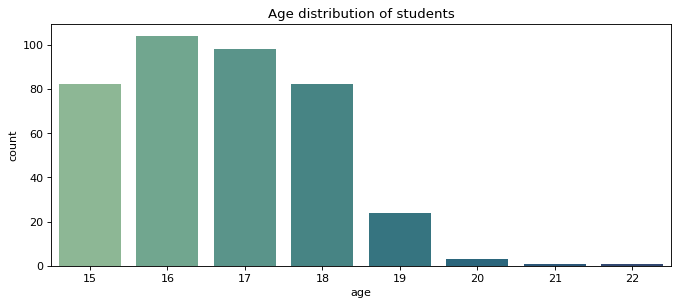

In [51]:
#drop the neglectible column for the schools and G1, G2
all_students = all_data.copy().drop(["school", "G1", "G2"], axis=1)
#cleanup the data by removing possible duplicates (just in case there are ^^)
all_students = all_students.drop_duplicates()

#make feature strings easier to read by replacing them with suitable words
#replace all occurrences of "T" with "Together" in the "Pstatus" column
all_students["Pstatus"] = all_students["Pstatus"].apply(lambda x: x.replace("T", "Together"))
#more adjustments
all_students["Pstatus"] = all_students["Pstatus"].apply(lambda x: x.replace("A", "Apart"))
all_students["address"] = all_students["address"].apply(lambda x: x.replace("R", "Rural"))
all_students["address"] = all_students["address"].apply(lambda x: x.replace("U", "Urban"))


#define color for future use of color palettes (eg. flare, Blues, Purples, magma, crest)
color_palette = "crest"

#plot the distribution of age using the mathplot library and some fanccy colors
plt.figure(figsize=(10,4), dpi=80)
sns.countplot(x = all_students["age"], palette=color_palette)
plt.title("Age distribution of students")
plt.show()

"""
#plot the distribution of gender
plt.figure(figsize=(10,4), dpi=80)
sns.countplot(x = all_students["sex"], palette=color_palette)
plt.title("Gender distribution of students")
plt.show()
"""


#grouping students by gender and getting the percentage
students_gender = all_students.groupby("sex").size() / len(all_students) * 100
# Plot the data as a pie chart
pieOfSex = px.pie(names=["Female", "Male"], values=students_gender.values, title="Gender distr. of students",  width=680, height=350, color_discrete_sequence=px.colors.sequential.Aggrnyl)
pieOfSex.update_traces(textfont_size=20)
pieOfSex.update_layout(margin={"l": 30, "r": 30, "t": 50, "b": 50})
pieOfSex.show()

Before looking at the data of alcohol consumption we shortly want to have a look at other interesting features we"d like to examine further by using a suitable piechart subplot.

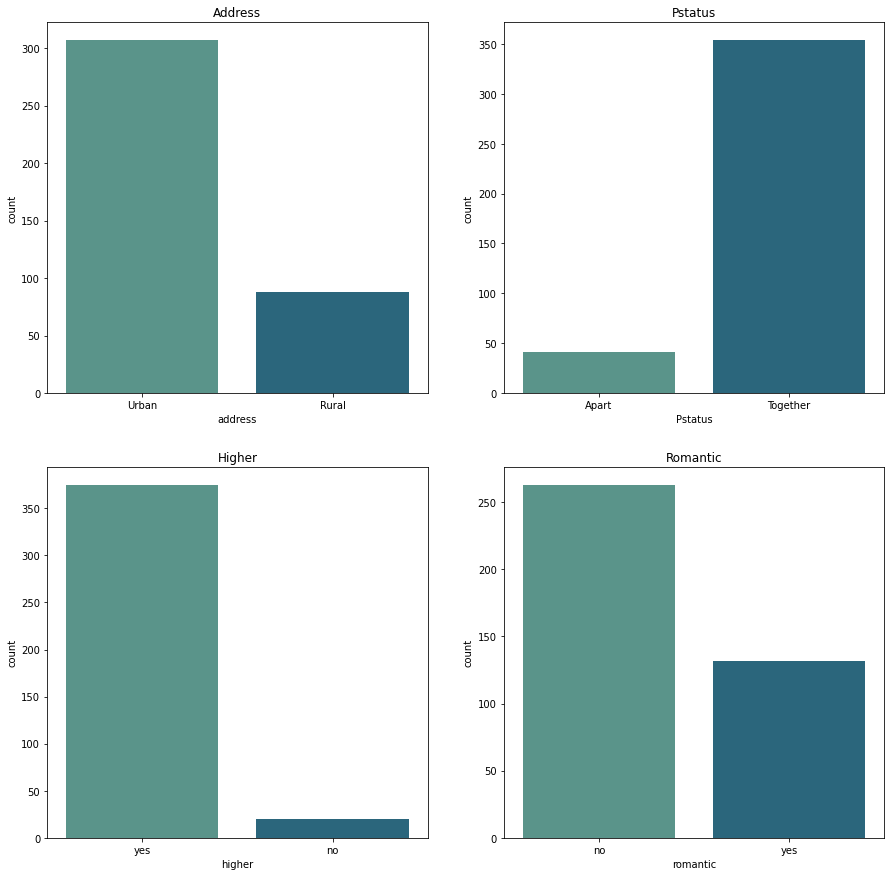

In [52]:
features=["address","Pstatus","higher", "romantic"]

plots, axes=plt.subplots(2,2,figsize=(15,15))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.countplot(x = all_students[feature], palette=color_palette)
    plt.title(feature.capitalize())
plt.show()

🚨🚨🚨🚨Insert valueable insights🚨🚨🚨🚨


Next off, lets have a look at the spicy information regarding the students performance in school. For that we are going to not only analyze hours spend studying, but also average grade distrbution and more. 

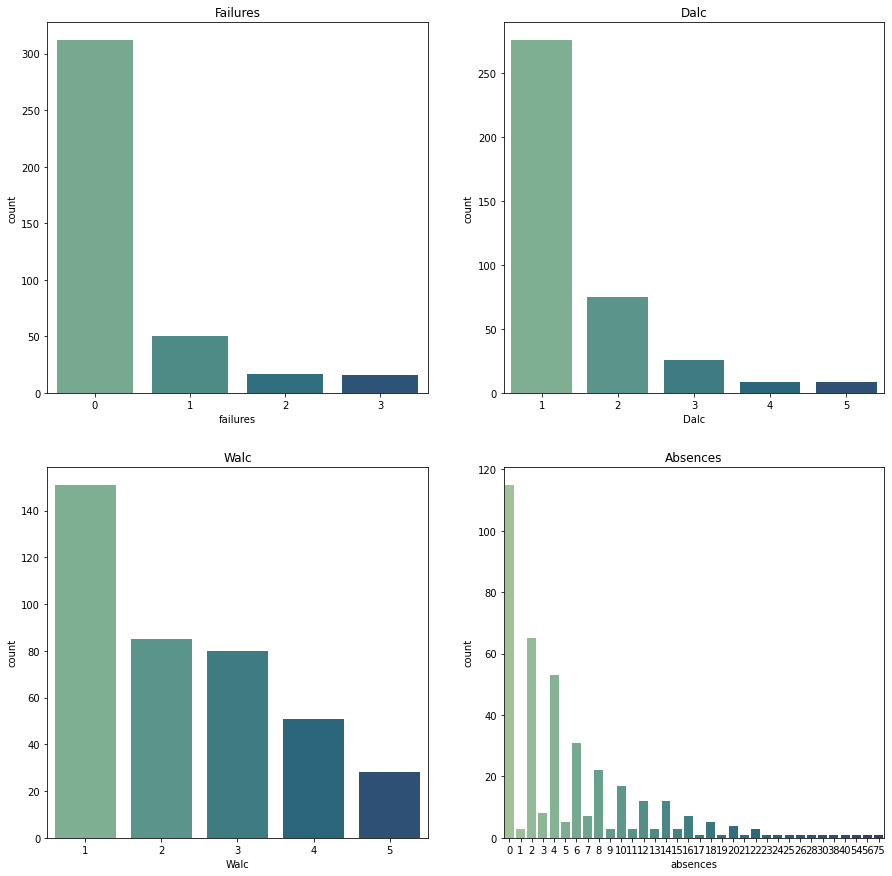

In [53]:
# Count the number of students in each category
time_labels = all_students["studytime"].unique().tolist()
students_studytime = all_students["studytime"].value_counts().tolist()

# Plot the data as a pie chart
pieOfSTime = px.pie(names=["2-5 hours","5-10 hours","< 2 hours","10+ hours"], values=students_studytime, title="Hours spend studying",  width=680, height=350, color_discrete_sequence=px.colors.sequential.Aggrnyl)
pieOfSTime.update_traces(textfont_size=20,textinfo="value")
pieOfSTime.update_layout(margin={"l": 30, "r": 30, "t": 50, "b": 50})
pieOfSTime.show()

features=["failures","Dalc","Walc", "absences"]

plots, axes=plt.subplots(2,2,figsize=(15,15))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.countplot(x = all_students[feature], palette=color_palette)
    plt.title(feature.capitalize())
plt.show()

# Check the data types of the columns
all_students = all_students.dropna()

# Create a new dataframe that contains the counts of each value in the "Dalc" and "Walc" columns
Dalc = all_students["Dalc"].value_counts()
Dalc_normalized = (all_students["Dalc"].value_counts(normalize=True)*100).round(decimals=2).apply(lambda x: str(x) + "%")
Walc = all_students["Walc"].value_counts()
Walc_normalized = (all_students["Walc"].value_counts(normalize=True)*100).round(decimals=2).apply(lambda x: str(x) + "%")

# Create a bar plot with the "Dalc" and "Walc" columns as the x-axis labels
# and the counts of each value as the y-axis values
fig = pgobj.Figure()
fig.add_trace(pgobj.Bar(
    x=Dalc.index,
    y=Dalc.values,
    text=Dalc_normalized,
    name="WORKDAY consumption",
    marker_color="darkseagreen"
))
fig.add_trace(pgobj.Bar(
    x=Walc.index,
    y=Walc.values,
    text=Walc_normalized,
    name="WEEKEND consumption",
    marker_color="teal"
))

fig.update_layout(title="Alcohol consumption during the week")
fig.show()



Let"s have a look at some features where we think that the alc consumption of students is affected. 


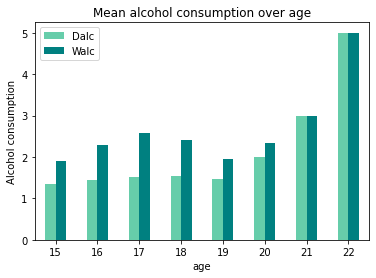

         Dalc            Walc      
         mean count      mean count
age                                
15   1.353659    82  1.902439    82
16   1.432692   104  2.278846   104
17   1.520408    98  2.571429    98
18   1.548780    82  2.414634    82
19   1.458333    24  1.958333    24
20   2.000000     3  2.333333     3
21   3.000000     1  3.000000     1
22   5.000000     1  5.000000     1


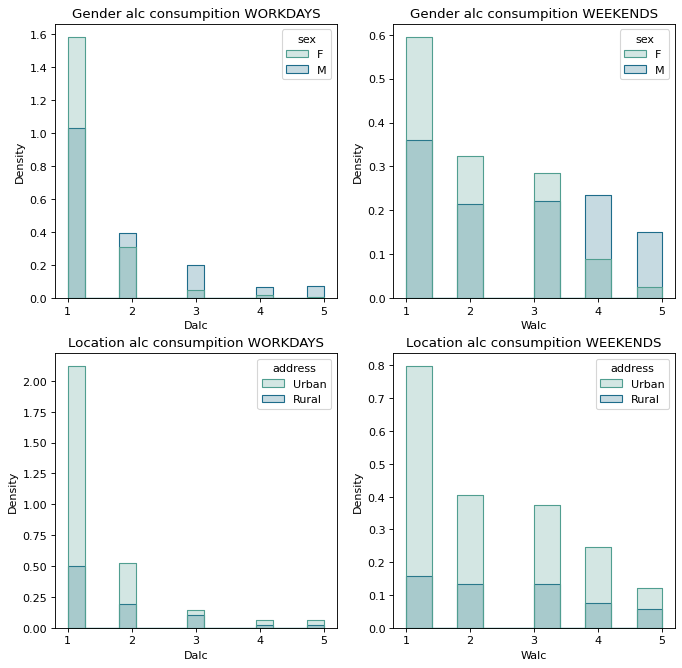

In [54]:
# Group the dataframe by the "age" column and calculate the mean of the "Dalc" and "Walc" columns
all_students.groupby("age")[["Dalc", "Walc"]].mean().plot(kind="bar", color=["mediumaquamarine", "teal"])

# Add a y-axis label and title
plt.ylabel("Alcohol consumption")
plt.title("Mean alcohol consumption over age")

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Show the plot
plt.show()

print(all_students.groupby("age")[["Dalc", "Walc"]].agg(["mean", "count"]))


# Comparing Genders
# Create a figure with two subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=80)

# Set the titles
ax[0,0].set_title("Gender alc consumpition WORKDAYS")
ax[0,1].set_title("Gender alc consumpition WEEKENDS")
ax[1,0].set_title("Location alc consumpition WORKDAYS")
ax[1,1].set_title("Location alc consumpition WEEKENDS")

# Plot the histograms 
sns.histplot(all_students, x="Dalc", hue="sex", element="step", stat="density", palette=color_palette, ax=ax[0,0])
sns.histplot(data=all_students, x="Walc", hue="sex", element="step", stat="density", palette=color_palette, ax=ax[0,1])
sns.histplot(all_students, x="Dalc", hue="address", element="step", stat="density", palette=color_palette, ax=ax[1,0])
sns.histplot(data=all_students, x="Walc", hue="address", element="step", stat="density", palette=color_palette, ax=ax[1,1])
fig.show()

In [55]:
# Group the data by the "sex" column and calculate the mean of the "Dalc" and "Walc" columns
table_genderAlc_data = all_students.groupby("sex")[["Dalc", "Walc"]].mean()

# Print the data in the table
print(table_genderAlc_data)
print()
# Proving that the difference between rural and urban alcohol consumption is significant
# Query dataset for students in rural and urban areas for weekend alcohol consumption
weekend_rural = all_students.query("address == 'Rural'")["Walc"]
weekend_urban = all_students.query("address == 'Urban'")["Walc"]

weekday_rural = all_students.query("address == 'Rural'")["Dalc"]
weekday_urban = all_students.query("address == 'Urban'")["Dalc"]

#import library for significance testing:
from scipy import stats as statistic

print("WEEKEND significance:",statistic.ttest_ind(weekend_rural, weekend_urban).pvalue)
print("WORKDAY significance:",statistic.ttest_ind(weekday_rural, weekday_urban).pvalue)


         Dalc      Walc
sex                    
F    1.254808  1.956731
M    1.732620  2.663102

WEEKEND significance: 0.04457793151864655
WORKDAY significance: 0.06340502103031039


🚨🚨🚨🚨 highlight importance of significance and elaborate🚨🚨🚨🚨




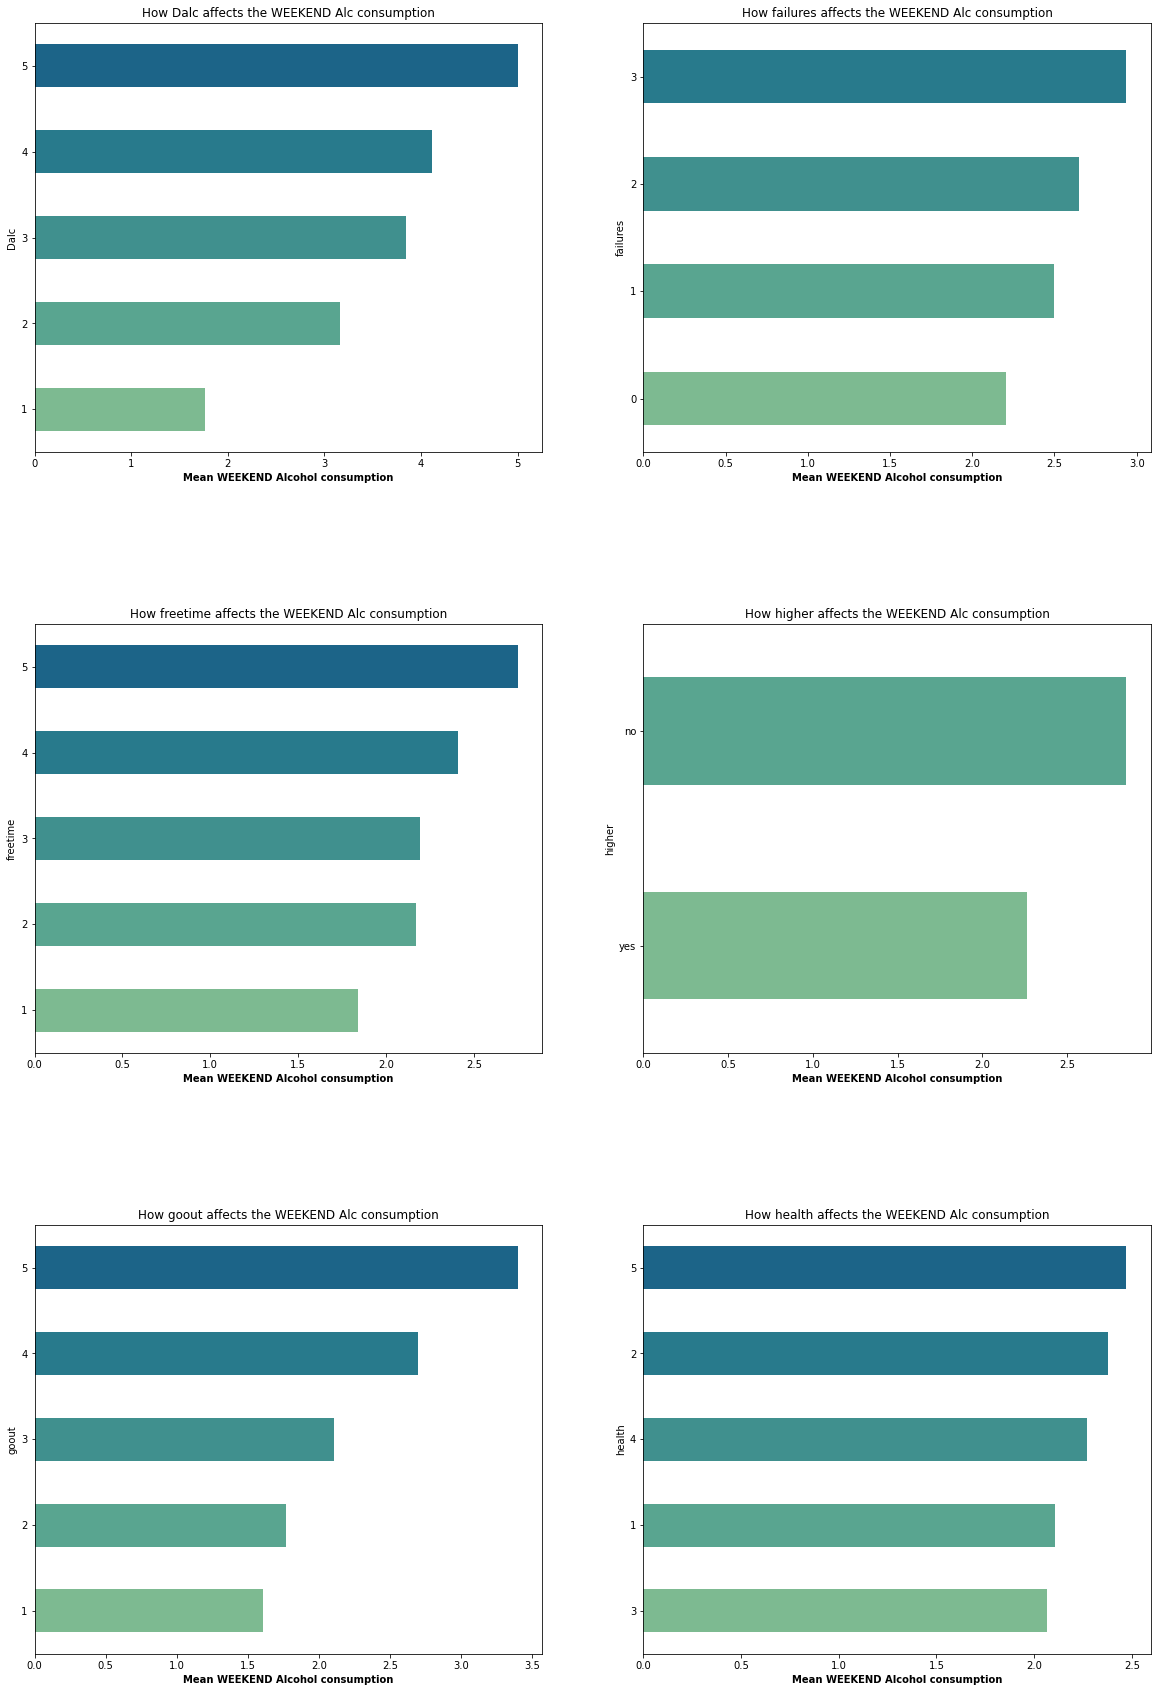

In [56]:
# Create the figure and axes objects
f, axes=plt.subplots(3,2, figsize=(20,30))
plt.subplots_adjust(hspace=0.4)
# Iterate over the features to plot
for i,feature in enumerate(["Dalc","failures","freetime","higher","goout","health"]):
    # Group the data by the feature and calculate the mean alcohol consumption on weekends
    plot_data = all_students.groupby(feature)["Walc"].mean().sort_values()
    
    # Plot the data as a horizontal bar plot
    plot_data.plot(kind="barh", color=sns.color_palette("crest"), ax=axes[i//2, i%2],
                   title="How "+feature+" affects the WEEKEND Alc consumption")
    
    # Set the x-axis label
    axes[i//2, i%2].set_xlabel("Mean WEEKEND Alcohol consumption", fontweight="bold")
plt.show()

Based on our analysis of the dataset, we found that the weekend alcohol consumption tends to increase with the increasing of the workday alcohol consumption. Additionally, males have an alcohol level consumption around 40% higher than females. The alcohol consumption also increases with the increasing number of previous class failures and with the increasing amount of free time, socializing, and perceived health. Interestingly, students who plan to continue their studies consume less alcohol than those who do not.


Let"s have the same look at the same features affecting daily alcohol consumption:

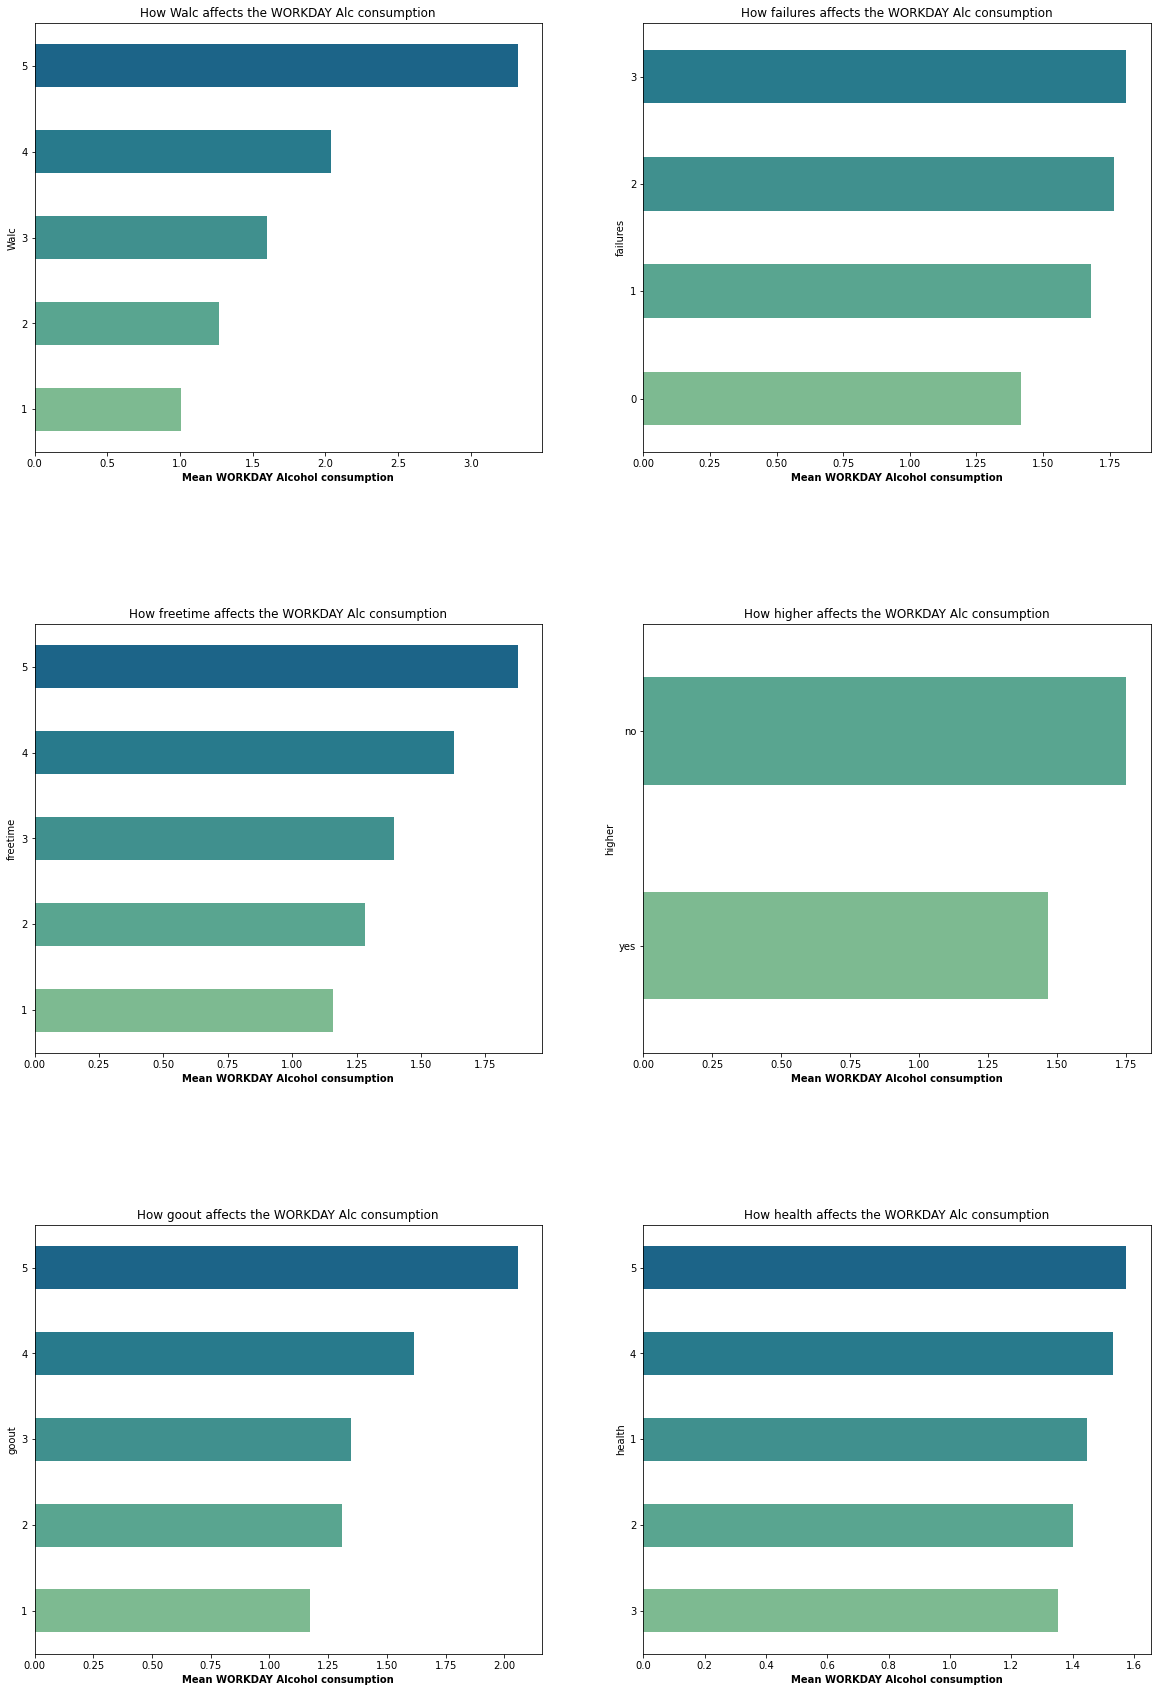

In [57]:
# Create the figure and axes objects
f, axes=plt.subplots(3,2, figsize=(20,30))
plt.subplots_adjust(hspace=0.4)
# Iterate over the features to plot
for i,feature in enumerate(["Walc","failures","freetime","higher","goout","health"]):
    # Group the data by the feature and calculate the mean alcohol consumption on weekends
    plot_data = all_students.groupby(feature)["Dalc"].mean().sort_values()
    
    # Plot the data as a horizontal bar plot
    plot_data.plot(kind="barh", color=sns.color_palette("crest"), ax=axes[i//2, i%2],
                   title="How "+feature+" affects the WORKDAY Alc consumption")
    
    # Set the x-axis label
    axes[i//2, i%2].set_xlabel("Mean WORKDAY Alcohol consumption", fontweight="bold")
plt.show()

# Let"s have a closer look of all features affecting grading.

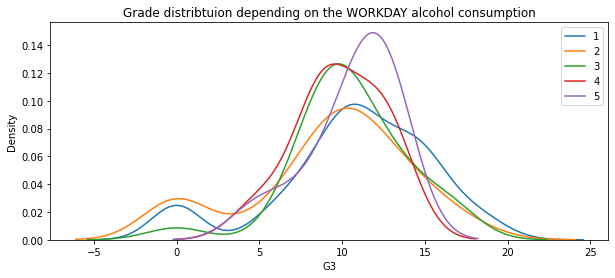

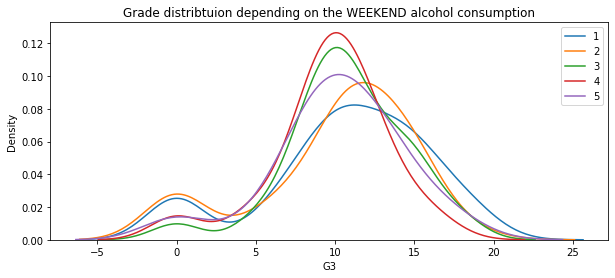

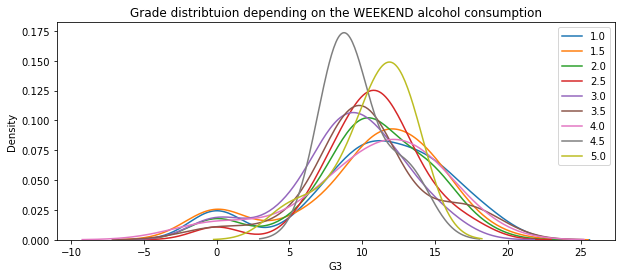

Highest Mean Dalc: 10.731884057971014 at consumption index: 1
Highest Mean Walc: 10.735099337748345 at consumption index: 1
–––––––––
Dalc - 2 consumption significance : 0.0192878681322908
Dalc - 3 consumption significance : 0.7532307681218111
Dalc - 4 consumption significance : 0.3803184594699919
Dalc - 5 consumption significance : 0.9461400782666927
–––––––––
Walc - 2 consumption significance : 0.33861317193348284
Walc - 3 consumption significance : 0.986312737283795
Walc - 4 consumption significance : 0.11288165231654103
Walc - 5 consumption significance : 0.5065951077806268


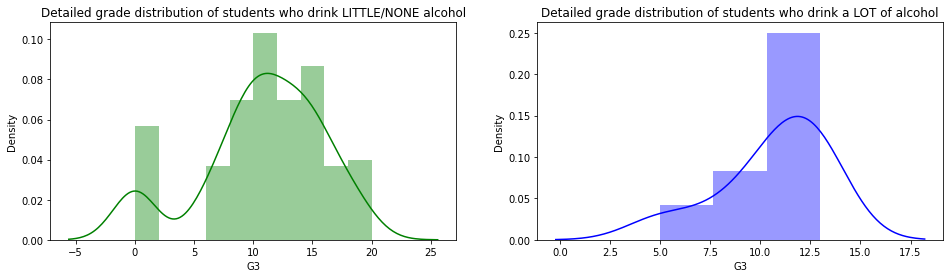

In [58]:
plt.figure(figsize=(10,4))
for dalc, grouped_data in all_students.groupby("Dalc"):
    sns.kdeplot(grouped_data["G3"], label=dalc)
plt.legend()
plt.title("Grade distribtuion depending on the WORKDAY alcohol consumption")
plt.show()

plt.figure(figsize=(10,4))
for dalc, grouped_data in all_students.groupby("Walc"):
    sns.kdeplot(grouped_data["G3"], label=dalc)
plt.legend()
plt.title("Grade distribtuion depending on the WEEKEND alcohol consumption")
plt.show()

# Sum and average both alc consumption comlumns
total_alc = ((all_students["Dalc"] + all_students["Walc"]) / 2).round(decimals=1)
# Add the new column to the dataframe
all_students["total_alc"] = total_alc


import warnings
warnings.filterwarnings("ignore")

# Draw plot for grade distribution 
plt.figure(figsize=(10,4))
for dalc, grouped_data in all_students.groupby("total_alc"):
    sns.kdeplot(grouped_data["G3"], label=dalc)
plt.legend()
plt.title("Grade distribtuion depending on the WEEKEND alcohol consumption")
plt.show()

f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(121) # First subplot
sns.distplot(all_students[(all_students.total_alc == 1.0)]["G3"], color="green", ax=ax1)
ax1.set_title("Detailed grade distribution of students who drink LITTLE/NONE alcohol")

ax2 = f.add_subplot(122) # Second subplot
sns.distplot(all_students[(all_students.total_alc == 5.0)]["G3"], color="blue", ax=ax2)
ax2.set_title("Detailed grade distribution of students who drink a LOT of alcohol")
f.show()

# Calc highest mean to determine variable for use with our significance testing
meanDalcs = all_students.groupby("Dalc")["G3"].mean().sort_values(ascending=False)
print("Highest Mean Dalc:", meanDalcs[meanDalcs.idxmax()].item(),"at consumption index:", meanDalcs.idxmax())

meanWalcs = all_students.groupby("Walc")["G3"].mean().sort_values(ascending=False)
print("Highest Mean Walc:", meanWalcs[meanWalcs.idxmax()].item(),"at consumption index:", meanWalcs.idxmax())
print("–––––––––")

# Testing our results for significance (workday) # COMPARING WITH HIGHEST MEAN VALUE
# creating query based on highest mean result to reuse in p-test
queryStringDalc = "Dalc == " + str(meanDalcs.idxmax())
queryStringWalc = "Walc == " + str(meanWalcs.idxmax())

# Delete the index we are comparing to to omit the resulting significance of 1 
baseSeriesAlcConsumtion = pd.Series([1, 2, 3, 4, 5], copy=False)
seriesWalc = baseSeriesAlcConsumtion.drop(meanWalcs.idxmax()-1)
seriesDalc = baseSeriesAlcConsumtion.drop(meanDalcs.idxmax()-1)


for dalc in seriesDalc:
  # Calculate the p-value using the t-test
  p_value_day = statistic.ttest_ind(all_students.query(queryStringDalc)["G3"], all_students.query("Dalc == {}".format(dalc))["G3"], equal_var=False).pvalue
  # Print the p-values
  print("Dalc -", dalc ,"consumption significance :", p_value_day)

print("–––––––––")
for walc in seriesWalc:
  # Calculate the p-value using the t-test
  p_value_day = statistic.ttest_ind(all_students.query(queryStringWalc)["G3"], all_students.query("Walc == {}".format(walc))["G3"], equal_var=False).pvalue
  # Print the p-values
  print("Walc -", walc ,"consumption significance :", p_value_day)

It is important to note that correlation does not imply causation. Just because there is a relationship between alcohol consumption on the weekends and grades does not necessarily mean that one causes the other. 

It could be that there are other factors at play that are influencing both alcohol consumption and grades. It is always important to consider all possible explanations for any observed relationship before drawing conclusions.

Knowing the partial significance of the grade distribution in relationship with the grades, we can now have a look at the average of grading to get a better overview.

🚨 Insert more explanaition to further elaborate this 

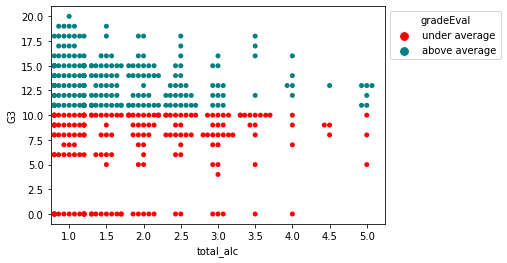

In [59]:
# Calculate grade average
average_grading = sum(all_students.G3)/float(len(all_students))

# Calculate if the students grade is above or below average and diplay the result in a plot
all_students["gradeEval"] = ["above average" if i > average_grading else "under average" for i in all_students.G3]
ax = sns.swarmplot(x="total_alc", y = "G3", hue = "gradeEval",data= all_students,palette={"above average":"teal", "under average": "red"})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

After observing the relationship between alcohol consumption and grade average, let"s take into account the relationship of students, maybe we will gain some insights. 

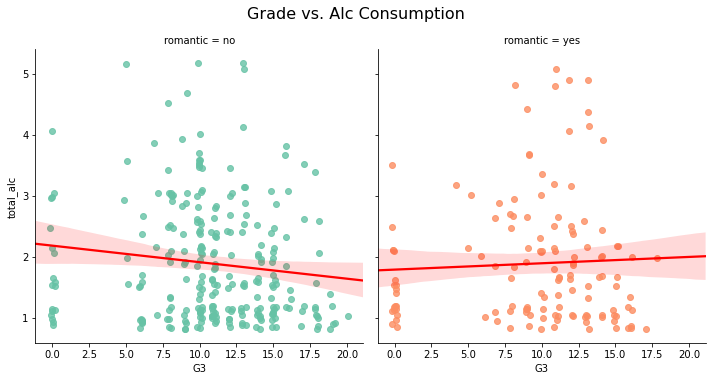

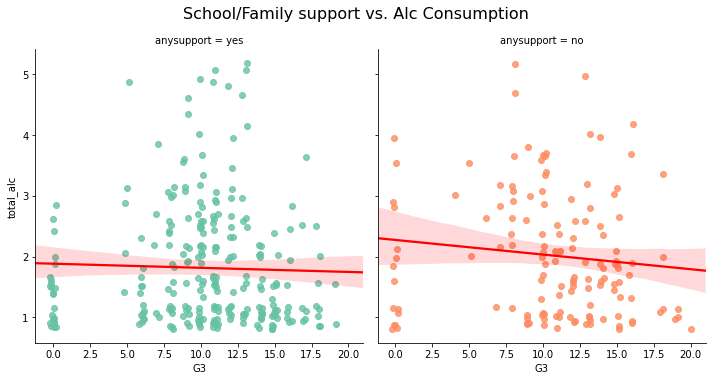

In [60]:
# Create plot to visualize relationship of total alc consumption, romantic relation and grades
g = sns.lmplot(data=all_students,x="G3", y="total_alc", col="romantic", hue="romantic",
           x_jitter=0.2, y_jitter=0.2, truncate=False, line_kws={"color": "red"},palette="Set2")
g.fig.suptitle("Grade vs. Alc Consumption", y=1.05, size=16)
plt.tight_layout()

# Create column to sum up any kind of support into one category (famsup+schoolsup)
all_students["anysupport"] = ["yes" if i == "yes" or j == "yes" else "no" for i,j in zip(all_students.famsup,all_students.schoolsup)]

# Create plot to visualize relationship of total alc consumption, family educational support and grades
g3 = sns.lmplot(data=all_students,x="G3", y="total_alc", col="anysupport", hue="anysupport",
           x_jitter=0.2, y_jitter=0.2, truncate=False,line_kws={"color": "red"},palette="Set2")
g3.fig.suptitle("School/Family support vs. Alc Consumption", y=1.05, size=16)
plt.tight_layout()

Let"s examine studytime and the affects on grading and what affects studytime.


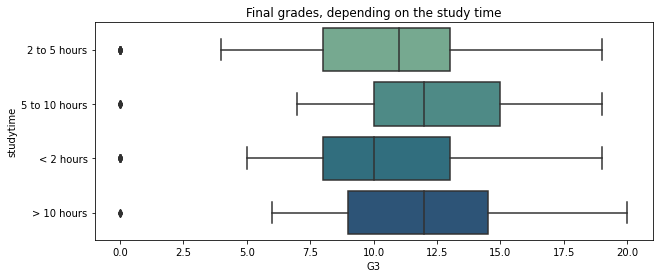

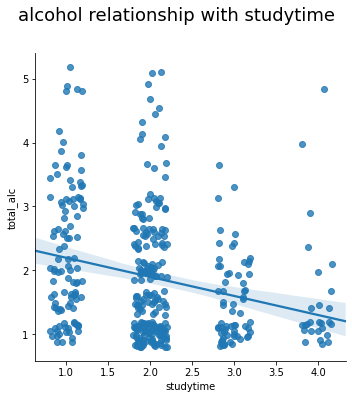

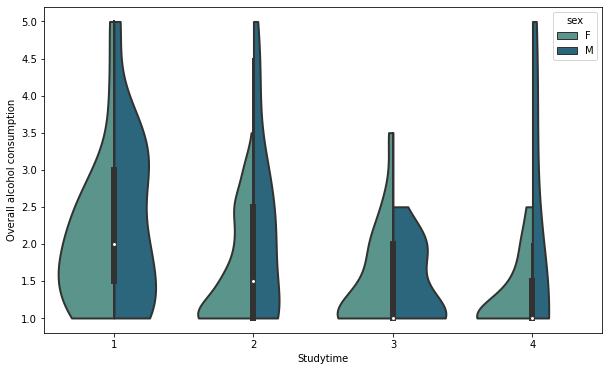

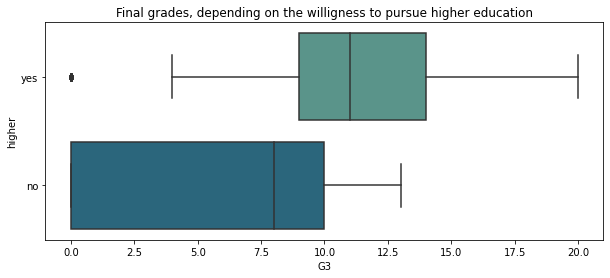

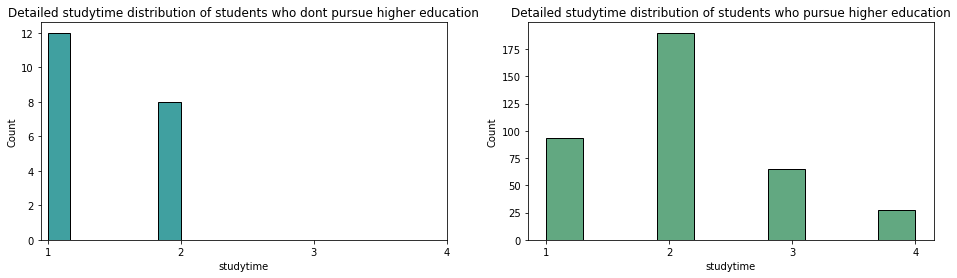

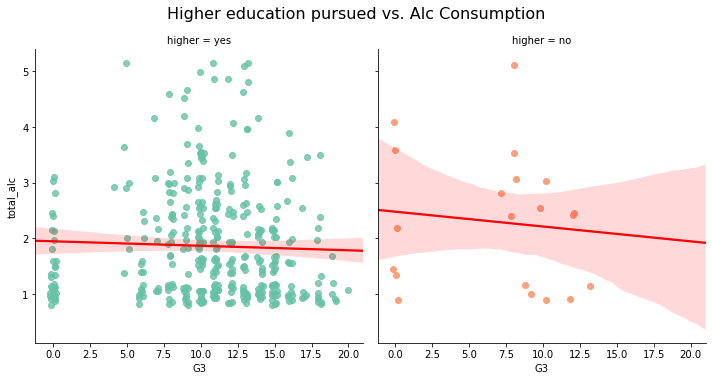

In [61]:
# Create new dataframe to work with with corresponding labels
studytime_students_copy = all_students.copy()
studytime_students_copy["studytime"].replace({1: "< 2 hours", 2: "2 to 5 hours", 3: "5 to 10 hours",4: "> 10 hours"},inplace=True)

# Plot study time to grade averages
plt.figure(figsize=(10,4))
plt.title("Final grades, depending on the study time")
sns.boxplot(y="studytime", x="G3", data = studytime_students_copy , orient="h", palette = color_palette)

gf = sns.lmplot(x="studytime", y="total_alc",
           x_jitter=0.2, y_jitter=0.2, data=all_students, truncate=False)
gf.fig.suptitle("alcohol relationship with studytime", y=1.1, size=18)
plt.show

# More refined violinplot version of the relationship of alcohol and studytime
plt.figure(figsize=(10,6))
sns.violinplot(data=all_students, x="studytime", y="total_alc", hue="sex",
               split=True, linewidth=2, palette=color_palette,cut=0)

plt.xlabel("Studytime")
plt.ylabel("Overall alcohol consumption")


# Plot higher education willigness to grade averages
plt.figure(figsize=(10,4))
plt.title("Final grades, depending on the willigness to pursue higher education")
sns.boxplot(y="higher", x="G3", data = studytime_students_copy , orient="h", palette = color_palette)

f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(121) # First subplot
sns.histplot(all_students[(all_students.higher == "no")]["studytime"], color="teal", ax=ax1)
ax1.set_xticks(range(1,5))
ax1.set_title("Detailed studytime distribution of students who dont pursue higher education")

ax2 = f.add_subplot(122) # Second subplot
sns.histplot(all_students[(all_students.higher == "yes")]["studytime"], color="seagreen", ax=ax2)
ax2.set_xticks(range(1,5))
ax2.set_title("Detailed studytime distribution of students who pursue higher education")
f.show()


# Create plot to visualize relationship of total alc consumption, family educational support and grades
g4 = sns.lmplot(data=all_students,x="G3", y="total_alc", col="higher", hue="higher",
           x_jitter=0.2, y_jitter=0.2, truncate=False,line_kws={"color": "red"},palette="Set2")
g4.fig.suptitle("Higher education pursued vs. Alc Consumption", y=1.05, size=16)
plt.tight_layout()




Let"s have a look at failures. First we need to check what the effect of failures have on a students grade. Afterwards we will explore what factors we think are affecting the failure of stundets related to personal behavior.

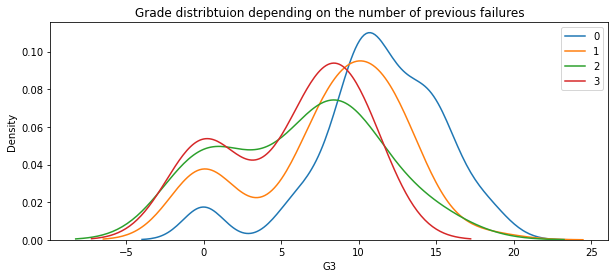

21.01% of students failed class at least once
78.99% of students never failed class


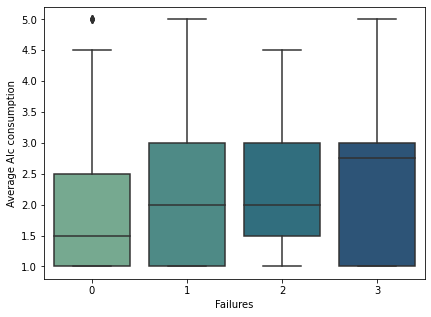

In [62]:
# Draw plot to visualize effect of failures on students final grades
plt.figure(figsize=(10,4))
for dalc, grouped_data in all_data.groupby("failures"):
    sns.kdeplot(grouped_data["G3"], label=dalc)
plt.legend()
plt.title("Grade distribtuion depending on the number of previous failures")
plt.show()

# Calculate percentage of people failing the class in general
# Count the number of 0s in the grades column
num_zeros = all_students["failures"].value_counts()[0]
percentageOfFails = num_zeros / len(all_students) * 100
print(f"{100-percentageOfFails:.2f}% of students failed class at least once")
print(f"{percentageOfFails:.2f}% of students never failed class")


# using boxplot to visualize relationship of failures and students total alcohol consumption
f = plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
boxplot1 =sns.boxplot(y="total_alc", x="failures", data = all_students, orient="v", palette=color_palette ,ax=ax)
boxplot1.set(xlabel="Failures",ylabel="Average Alc consumption")
plt.show()

By the shift of the median we can see that statstically the alc consumption  increases with a higher number of failures or vice versa. 


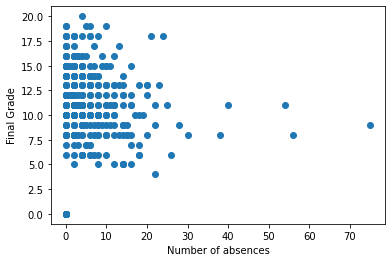

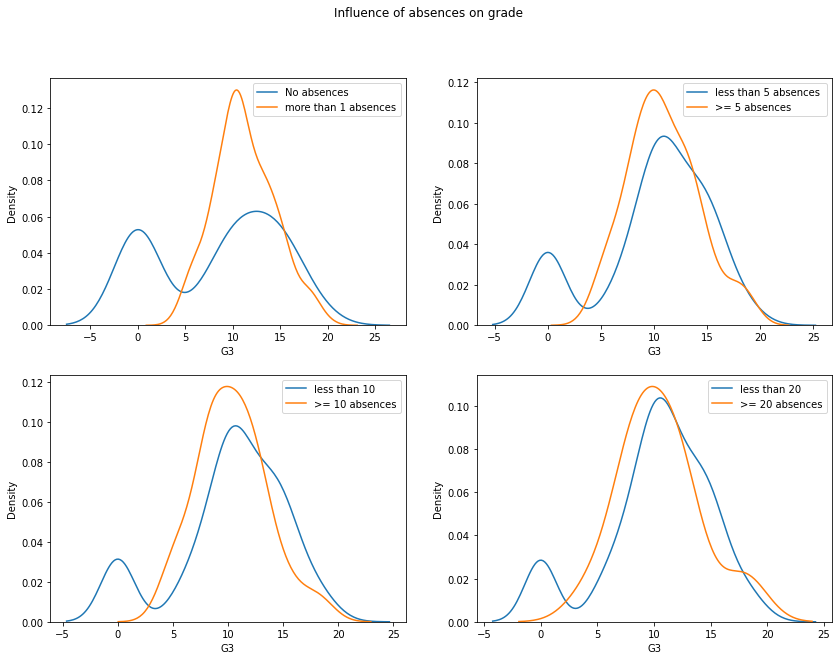

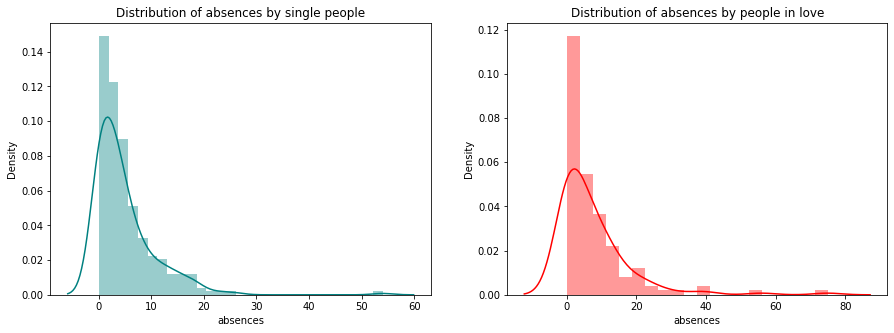

Abscences romantic significance: 0.002236359165995207


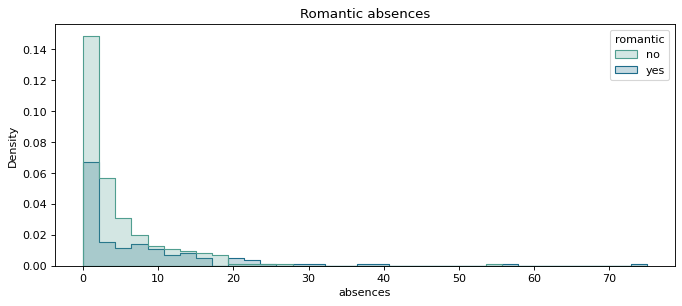

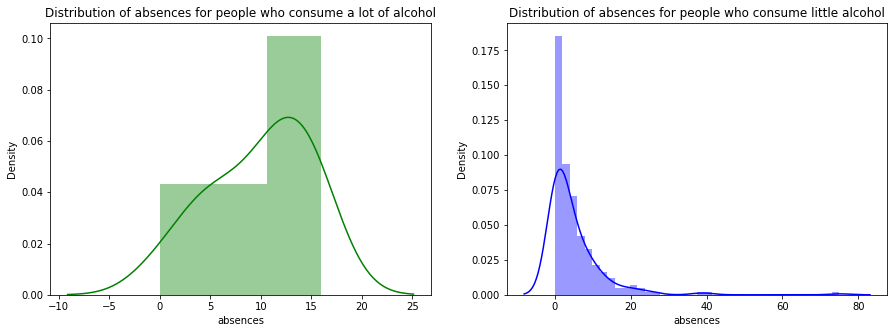

In [63]:
# Scatter absences
plt.scatter(all_students["absences"], all_students["G3"])
plt.xlabel("Number of absences")
plt.ylabel("Final Grade")
plt.show()

# Create 4 subplots for abscenses 
plots, axes = plt.subplots(2, 2, figsize=(14,10))
plots.suptitle("Influence of absences on grade")
sns.kdeplot(all_students.query("absences == 0")["G3"], label="No absences", ax=axes[0, 0])
sns.kdeplot(all_students.query("absences > 0")["G3"], label="more than 1 absences", ax=axes[0, 0])
axes[0, 0].legend()

sns.kdeplot(all_students.query("absences < 5")["G3"], label="less than 5 absences ", ax=axes[0, 1])
sns.kdeplot(all_students.query("absences >= 5 ")["G3"], label=">= 5 absences", ax=axes[0, 1])
axes[0, 1].legend()

sns.kdeplot(all_students.query("absences < 10")["G3"], label="less than 10 ", ax=axes[1, 0])
sns.kdeplot(all_students.query("absences >= 10 ")["G3"], label=">= 10 absences", ax=axes[1, 0])
axes[1, 0].legend()

sns.kdeplot(all_students.query("absences < 20")["G3"], label="less than 20 ", ax=axes[1, 1])
sns.kdeplot(all_students.query("absences >= 20 ")["G3"], label=">= 20 absences", ax=axes[1, 1])
axes[1, 1].legend()
plt.show()


# Create plot showing distribution of romantic relationships and abscenses
f= plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
sns.distplot(all_students[(all_students.romantic == "no")]["absences"],color="teal",ax=ax)
ax.set_title("Distribution of absences by single people")

ax=f.add_subplot(122)
sns.distplot(all_students[(all_students.romantic == "yes")]["absences"],color="red",ax=ax)
ax.set_title("Distribution of absences by people in love")
plt.show()

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4), dpi=80)
ax.set_title("Romantic absences")

# Plot the histograms 
sns.histplot(all_students, x="absences", hue="romantic", element="step", stat="density", palette=color_palette, ax=ax)
fig.show()

# Test for romantic significance
absences_romantic = all_students.query("romantic == 'yes'")["absences"]
absences_no_romantic = all_students.query("romantic == 'no'")["absences"]
print("Abscences romantic significance:",statistic.ttest_ind(absences_no_romantic, absences_romantic).pvalue)


# Draw plot for affect of alc consumption on absences
f= plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
sns.distplot(all_students[(all_students.total_alc > 4)]["absences"],color="green",ax=ax)
ax.set_title("Distribution of absences for people who consume a lot of alcohol")
ax=f.add_subplot(122)
sns.distplot(all_students[(all_students.total_alc < 2)]["absences"],color="blue",ax=ax)
ax.set_title("Distribution of absences for people who consume little alcohol")
plt.show()

# Categorization and correlation

1. Drop irrelevant features and clean up dataset
2. Categorize features to be used in our ml algorithms
3. 

In [64]:
# PREPROCESSING OF DATA
# Convertion of "object values" to numerical category
# Create new dataset for categorization

categorized_students = all_students.copy()

# Remove irrelevant features
categorized_students = categorized_students.drop(["famsize", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "paid", "activities", "nursery", "internet", "famrel","schoolsup","famsup","gradeEval"], axis=1)

# Examine which features need to be categorized as integer values for our model generation and learning algorithm
print(categorized_students.info())

# Categorization of features
categorized_students["sex"] = categorized_students["sex"].astype("category")
categorized_students["sex"] = categorized_students["sex"].cat.codes

categorized_students["address"] = categorized_students["address"].astype("category")
categorized_students["address"] = categorized_students["address"].cat.codes

categorized_students["Pstatus"] = categorized_students["Pstatus"].astype("category")
categorized_students["Pstatus"] = categorized_students["Pstatus"].cat.codes

categorized_students["higher"] = categorized_students["higher"].astype("category")
categorized_students["higher"] = categorized_students["higher"].cat.codes

categorized_students["romantic"] = categorized_students["romantic"].astype("category")
categorized_students["romantic"] = categorized_students["romantic"].cat.codes

categorized_students["anysupport"] = categorized_students["anysupport"].astype("category")
categorized_students["anysupport"] = categorized_students["anysupport"].cat.codes

# Examine if feature conversion was successful 
print(categorized_students.info())
print(categorized_students.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   address     395 non-null    object 
 3   Pstatus     395 non-null    object 
 4   studytime   395 non-null    int64  
 5   failures    395 non-null    int64  
 6   higher      395 non-null    object 
 7   romantic    395 non-null    object 
 8   freetime    395 non-null    int64  
 9   goout       395 non-null    int64  
 10  Dalc        395 non-null    int64  
 11  Walc        395 non-null    int64  
 12  health      395 non-null    int64  
 13  absences    395 non-null    int64  
 14  G3          395 non-null    int64  
 15  total_alc   395 non-null    float64
 16  anysupport  395 non-null    object 
dtypes: float64(1), int64(10), object(6)
memory usage: 71.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Inde

# Correlation and ML

1. linar feature correlation matrix to determine importance of features vs interpretations made prior
2. knn Neirest neighbors to determine predictability and accuracy of the model 
3. random tree algorithm to determine predictability and accuracy of the model 
4. ....more

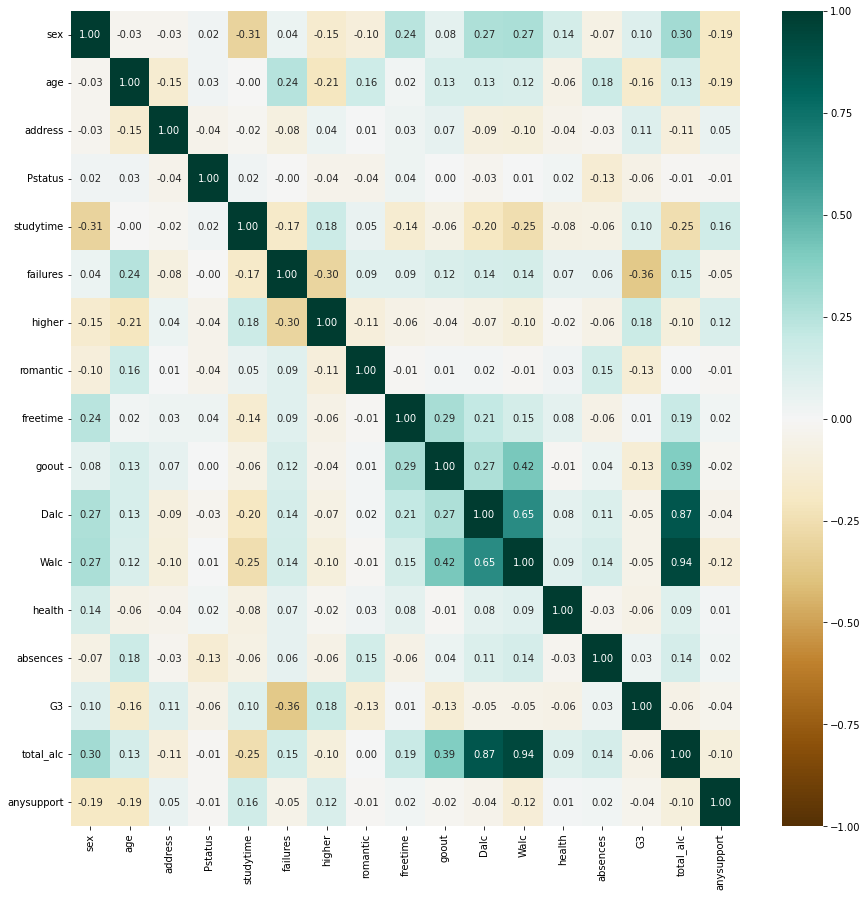

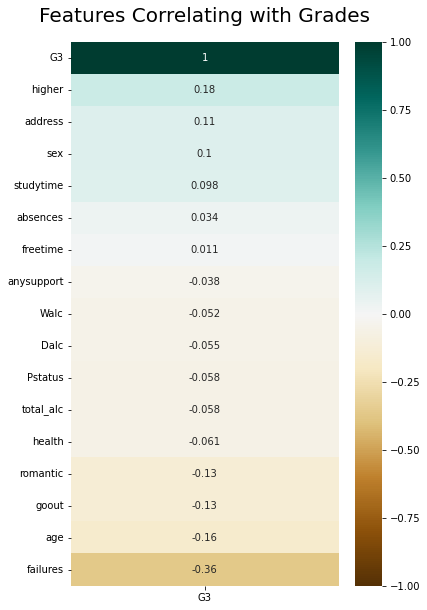

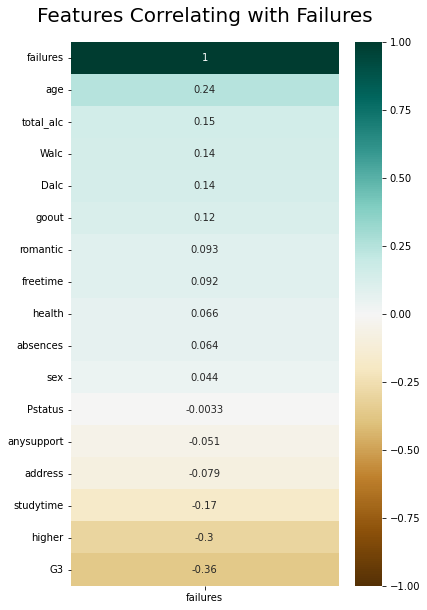

In [65]:
"""
# Correlation of only specific features
plt.figure(figsize=(20,9))
cols = ["Dalc","Walc","G3","studytime","romantic","age","sex","Pstatus"]
cm = np.corrcoef(categorized_students[cols].values.T)
sns.set(font_scale = 1.2)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = ".2f", annot_kws = {"size":15}, yticklabels = cols, xticklabels = cols)
plt.show()
"""

# Draw a big correlation matrix 
plt.figure(figsize=(15,15))
sns.heatmap(categorized_students.corr(),annot = True,fmt = ".2f",cbar = True, cmap="BrBG", vmin=-1, vmax=1)
plt.show()

# Focus on features correlating with grades
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(categorized_students.corr()[["G3"]].sort_values(by="G3", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Features Correlating with Grades", fontdict={"fontsize":20}, pad=20);
plt.show

# Focus on features correlating with failures
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(categorized_students.corr()[["failures"]].sort_values(by="failures", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Features Correlating with Failures", fontdict={"fontsize":20}, pad=20);
plt.show()

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# Correlation: Calculating the correlations of "failures" or "grade" with other column values
categorized_students_failures = categorized_students.corrwith(categorized_students["failures"])
categorized_students_grade = categorized_students.corrwith(categorized_students["G3"])

# Sorting correlation
categorized_students_failures = np.flip(categorized_students_failures.sort_values())
categorized_students_grade = np.flip(categorized_students_grade.sort_values())

# extracting highest correlations
highestCorrelationsSetFailures = categorized_students_failures.reset_index()
highestCorrelationsSetGrades = categorized_students_grade.reset_index()


# Print all most important correlations (as in the correlation matrix) to focus on the most important values
print("First highest correlation (Failures):", highestCorrelationsSetFailures.iloc[1]["index"]," →",highestCorrelationsSetFailures.iloc[1][0])
print("Second highest correlation (Failures):", highestCorrelationsSetFailures.iloc[2]["index"]," →",highestCorrelationsSetFailures.iloc[2][0])
print("Highest positive correlation (Failures):\n", highestCorrelationsSetFailures.iloc[1:8])
print("Highest negative correlation (Failures):\n", highestCorrelationsSetFailures.iloc[-8:])

print()
print("First highest correlation (Grades):", highestCorrelationsSetGrades.iloc[1]["index"]," →",highestCorrelationsSetGrades.iloc[1][0])
print("Second highest correlation (Grades):", highestCorrelationsSetGrades.iloc[2]["index"]," →",highestCorrelationsSetGrades.iloc[2][0])
print("Highest positive correlation (Grades):\n", highestCorrelationsSetGrades.iloc[1:8])
print("Highest negative correlation (Grades):\n", highestCorrelationsSetGrades.iloc[-8:])



First highest correlation (Failures): age  → 0.24366537664171944
Second highest correlation (Failures): total_alc  → 0.15320332600501818
Highest positive correlation (Failures):
        index         0
1        age  0.243665
2  total_alc  0.153203
3       Walc  0.141962
4       Dalc  0.136047
5      goout  0.124561
6   romantic  0.093137
7   freetime  0.091987
Highest negative correlation (Failures):
          index         0
9     absences  0.063726
10         sex  0.044436
11     Pstatus -0.003339
12  anysupport -0.051416
13     address -0.078578
14   studytime -0.173563
15      higher -0.300316
16          G3 -0.360415

First highest correlation (Grades): higher  → 0.18246461785815765
Second highest correlation (Grades): address  → 0.10575606393084076
Highest positive correlation (Grades):
         index         0
1      higher  0.182465
2     address  0.105756
3         sex  0.103456
4   studytime  0.097820
5    absences  0.034247
6    freetime  0.011307
7  anysupport -0.038024
Hig

# Selecting the most precise ML algorithm for prediction:

1. linear regression
2. kNN
3. DecisionTree Algorithm
4. RandomForest
5. Gaussian Naive Bayes
6. XBoost


In [67]:
"""
sex            0.0
age           18.0 - 
address        1.0
Pstatus        0.0 -
studytime      2.0
failures       0.0
higher         1.0 
romantic       0.0 
freetime       3.0 -
goout          4.0 
Dalc           1.0
Walc           1.0
health         3.0 -
absences       6.0
G3             6.0
total_alc      1.0
anysupport     1.0 
[s, ad, s, f, h, r, g, d, w, a,g,t,a]
G3SET = [0, 1, 2, 0, 1, 0, 4, 1, 1, 6, 1, 1]
FAILURESET = [0, 1, 2, 1, 0, 4, 1, 1, 6, 6, 1, 1]
[0, 1, 2, 0, 1, 0, 3, 4, 1, 1, 3,6,1,1]
"""
from sklearn import linear_model

# DUPLICATE THE COMPLETE DATASET TO HAVE MORE ENTRIES TO WORK WITH IN ORDER TO USE LINEAR REGRESSION
duplicated_categorized_students = pd.concat([categorized_students, categorized_students, categorized_students])

g3_prediction_Testset = [0, 1, 2, 0, 1, 0, 4, 1, 1, 6, 1, 1]
failure_prediction_Testset = [0, 1, 2, 1, 0, 4, 1, 1, 6, 6, 1, 1]


# split in 2 subsets: train & test randomly and stratify to have the same varieties of each group in each subset
print("–––––––––––LINEAR REGRESSION–––––––––––––")

#GRADES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# IGNORE CODE: categorized_students[["sex","age","address","Pstatus","studytime","failures","higher","romantic","freetime","goout","Dalc","Walc","health","absences","G3","total_alc","anysupport"]]
# DROP FEATURES OUT OF SCOPE AND RELEVANCE
X_g3 = duplicated_categorized_students.drop(["age","G3","health","freetime","Pstatus",], axis=1)
y_g3 = duplicated_categorized_students["G3"]

# Trainset
X_g3_train, X_g3_test, y_g3_train, y_g3_test = train_test_split(X_g3, y_g3, test_size=0.3, random_state=420, stratify=y_g3)

# Before we create the model we transform dataframe to array
dataX_g3 = X_g3
X_g3_train = np.array(dataX_g3)
y_g3_train = y_g3

# Creation of model as Lineal Regression with variables
regr_g3 = linear_model.LinearRegression()
regr_g3.fit(X_g3_train, y_g3_train)
# Prediction
y_pred = regr_g3.predict(X_g3_train)

# Compute R^2 value to determine effectiveness of model
r2_g3 = regr_g3.score(X_g3_test, y_g3_test)*100
print("R2 effectiveness score for (GRADE|Linar Regression):", r2_g3, "%")

# Selecting the first element of the dataframe and testing it
testing_model_array_g3_linear = np.array(g3_prediction_Testset)
print("Prediction for",testing_model_array_g3_linear)
y_pred_g3_linear = regr_g3.predict([testing_model_array_g3_linear])
print("The GRADE predicted is:",int(y_pred_g3_linear))
# -> Grade predicted is super inaccurate as the r2 score aleady indicated


# FAILURES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

X_failures = duplicated_categorized_students.drop(["age","failures","health","freetime","Pstatus"], axis=1)
y_failures = duplicated_categorized_students["failures"]

# Trainset
X_failures_train, X_failures_test, y_failures_train, y_failures_test = train_test_split(X_failures, y_failures, test_size=0.3, random_state=420, stratify=y_failures)

dataX_failures = X_failures
X_failures_train = np.array(dataX_failures)
y_failures_train = y_failures

# Creation of model as Lineal Regression with variables
regr_failures = linear_model.LinearRegression()
regr_failures.fit(X_failures_train, y_failures_train)
# Prediction
y_pred = regr_failures.predict(X_failures_train)

# Compute R^2 value to determine effectiveness of model
r2_failures = regr_failures.score(X_failures_test, y_failures_test)*100
print("R2 effectiveness score for (FAILURES|Linar Regression):", r2_failures,"%")

# Select the first element of the dataframe
testing_model_array_failures_linear = np.array(failure_prediction_Testset)
print("Prediction for",testing_model_array_failures_linear)
y_pred_failures_linear = regr_failures.predict([testing_model_array_failures_linear])
print("The FAILURES predicted is:",int(y_pred_failures_linear))


–––––––––––LINEAR REGRESSION–––––––––––––
R2 effectiveness score for (GRADE|Linar Regression): 22.98828278593863 %
Prediction for [0 1 2 0 1 0 4 1 1 6 1 1]
The GRADE predicted is: 10
R2 effectiveness score for (FAILURES|Linar Regression): 21.402946367874677 %
Prediction for [0 1 2 1 0 4 1 1 6 6 1 1]
The FAILURES predicted is: 0


In [68]:
## ------ kNN ML Algorithm SELF OPTIMIZINGGG!! 
print("–––––––––– KNN ALGORITHM ––––––––––––––")

#GRADES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Use the same test sets as in the linear regression 
X_g3_train, X_g3_test, y_g3_train, y_g3_test = train_test_split(X_g3, y_g3, test_size=0.3, random_state=420, stratify=y_g3)

# train - creating a model and training it with values using euclidean distance between 1 and 100
# creating a new set of neighbors to find the best accuracy model based on the number of neighbors 
neighborsSet = {"neighbors": [], "accuracy": []}
accuracydatasetNeighbors = pd.DataFrame(neighborsSet)
print("\n...please wait, calculating OPTIMAL NEIGHBORS & ACCURACY for GRADES....\n")
for i in range(4,int(len(categorized_students)/5)): #info : this number is arbitrary to limit the number of calculations done -> HOWEVER, we start at 4 since we trippled the original dataset for more entries and pursue a more realistic score
  knn_model_g3 = KNeighborsClassifier(metric="euclidean", n_neighbors=i)
  knn_model_g3.fit(X_g3_train, y_g3_train)
  y_g3_pred = knn_model_g3.predict(X_g3_test)
  temp_accuracy = (100.0 * knn_model_g3.score(X_g3_test, y_g3_test))
  print("Neighbors:",i,"| Accuracy: %.2f%%" % temp_accuracy)
  newRow = {"neighbors": i,"accuracy": temp_accuracy}
  accuracydatasetNeighbors = accuracydatasetNeighbors.append(newRow, ignore_index=True)

accuracydatasetNeighbors = accuracydatasetNeighbors.sort_values(by="accuracy",ascending=False)
print("\nNumber of OPTIMAL NEIGHBORS with highest accuracy for determining GRADES using kNN:",int(accuracydatasetNeighbors.iloc[0][0]), "- ACCURACY: %.2f%%" % accuracydatasetNeighbors.iloc[0][1])

# Using optimal amount of neighbors to predict
knn_model_g3_final = KNeighborsClassifier(metric="euclidean", n_neighbors=int(accuracydatasetNeighbors.iloc[0][0]))
knn_model_g3_final.fit(X_g3_train, y_g3_train)
# Compute R^2 value to determine effectiveness of knn model
r2_g3_knn = knn_model_g3_final.score(X_g3_test, y_g3_test)
print("R2 effectiveness score for (GRADES|kNN Nearest Neighbor):", r2_g3_knn,"%")

testing_model_array_g3_knn = np.array(g3_prediction_Testset)
print("Prediction for",testing_model_array_g3_knn)
y_pred_g3_knn = knn_model_g3_final.predict([testing_model_array_g3_knn])
print("The GRADE predicted is:",int(y_pred_g3_knn))

# FAILURES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Trainset for failures
X_failures_train, X_failures_test, y_failures_train, y_failures_test = train_test_split(X_failures, y_failures, test_size=0.3, random_state=420, stratify=y_failures)

# train - creating a model and training it with values using euclidean distance between 1 and 100
# creating a new set of neighbors to find the best accuracy model based on the number of neighbors 
neighborsSet = {"neighbors": [], "accuracy": []}
accuracydatasetNeighbors_failures = pd.DataFrame(neighborsSet)
print("\n...please wait, calculating OPTIMAL NEIGHBORS & ACCURACY for FAILURES....\n")
for i in range(4,int(len(categorized_students)/5)): #info : this number is arbitrary to limit the number of calculations done -> HOWEVER, we start at 4 since we trippled the original dataset for more entries and pursue a more realistic score
  knn_model_failures = KNeighborsClassifier(metric="euclidean", n_neighbors=i)
  knn_model_failures.fit(X_failures_train, y_failures_train)
  y_failures_pred = knn_model_failures.predict(X_failures_test)
  temp_accuracy = (100.0 * knn_model_failures.score(X_failures_test, y_failures_test))
  print("Neighbors:",i,"| Accuracy: %.2f%%" % temp_accuracy)
  newRow = {"neighbors": i,"accuracy": temp_accuracy}
  accuracydatasetNeighbors_failures = accuracydatasetNeighbors_failures.append(newRow, ignore_index=True)

accuracydatasetNeighbors_failures = accuracydatasetNeighbors_failures.sort_values(by="accuracy",ascending=False)
print("\nNumber of OPTIMAL NEIGHBORS with highest accuracy for determining FAILURES using kNN:",int(accuracydatasetNeighbors_failures.iloc[0][0]), "- ACCURACY: %.2f%%" % accuracydatasetNeighbors_failures.iloc[0][1])

# Using optimal amount of neighbors to predict
knn_model_failures_final = KNeighborsClassifier(metric="euclidean", n_neighbors=int(accuracydatasetNeighbors_failures.iloc[0][0]))
knn_model_failures_final.fit(X_failures_train, y_failures_train)
# Compute R^2 value to determine effectiveness of knn model
r2_failures_knn = knn_model_failures_final.score(X_failures_test, y_failures_test)
print("R2 effectiveness score for (FAILURES|kNN Nearest Neighbor):", r2_failures_knn,"%")

testing_model_array_failures_knn = np.array(failure_prediction_Testset)
print("Prediction for",testing_model_array_failures_knn)
y_pred_failures_knn = knn_model_failures_final.predict([testing_model_array_failures_knn])
print("The FAILURES predicted is:",int(y_pred_failures_knn))



–––––––––– KNN ALGORITHM ––––––––––––––

...please wait, calculating OPTIMAL NEIGHBORS & ACCURACY for GRADES....

Neighbors: 4 | Accuracy: 42.98%
Neighbors: 5 | Accuracy: 35.67%
Neighbors: 6 | Accuracy: 33.15%
Neighbors: 7 | Accuracy: 33.15%
Neighbors: 8 | Accuracy: 31.46%
Neighbors: 9 | Accuracy: 31.74%
Neighbors: 10 | Accuracy: 32.30%
Neighbors: 11 | Accuracy: 30.90%
Neighbors: 12 | Accuracy: 31.46%
Neighbors: 13 | Accuracy: 31.46%
Neighbors: 14 | Accuracy: 31.18%
Neighbors: 15 | Accuracy: 30.06%
Neighbors: 16 | Accuracy: 31.46%
Neighbors: 17 | Accuracy: 31.18%
Neighbors: 18 | Accuracy: 31.18%
Neighbors: 19 | Accuracy: 30.62%
Neighbors: 20 | Accuracy: 30.90%
Neighbors: 21 | Accuracy: 31.46%
Neighbors: 22 | Accuracy: 29.78%
Neighbors: 23 | Accuracy: 27.53%
Neighbors: 24 | Accuracy: 27.53%
Neighbors: 25 | Accuracy: 26.97%
Neighbors: 26 | Accuracy: 27.81%
Neighbors: 27 | Accuracy: 28.65%
Neighbors: 28 | Accuracy: 27.25%
Neighbors: 29 | Accuracy: 27.25%
Neighbors: 30 | Accuracy: 25.84%
N

Determine the perfect depth and test size for our Decision Tree algorithm. Find out the best precision achieveable. 

In [69]:
## ------ DECISION TREE ALGORITM - SELF OPTIMIZING DEPTH!! 
print("–––––––––– DECISION TREE ALGORITM ––––––––––––––")

from sklearn.tree import DecisionTreeClassifier

#GRADES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# reating a new table to find the best accuracy based on the depth of tree
treeDepthSizeSet = {"depth": [], "accuracy": []}
treeAccuracySet = pd.DataFrame(treeDepthSizeSet)
print("\nplease wait, calculating OPTIMIUM TREE SIZES FOR GRADES....\n")

calc = 0
#set max range to 99 -> otherwise testSize will be 0 at some point

X_g3_train, X_g3_test, y_g3_train, y_g3_test = train_test_split(X_g3, y_g3, test_size=0.3, random_state=420, stratify=y_g3)
#calculate maximium possible length of tree and iterating up to that point
max_depth = max(len(X_g3_train)-1,3)

previous_acc = 0
temp_accuracy = 0
# starting the self optimization algorithm
for depth in range(1,max_depth):
    tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=420)
    tree_model.fit(X_g3_train, y_g3_train)
    y_pred = tree_model.predict(X_g3_test)

    calc += 1
    """
    #for debug
    print("\rMAXDEPTH:", max_depth)
    print("\rDEPTH:",depth)
    print("\rMisclassified samples: %d" % (y_g3_test != y_pred).sum())
    print("\rAccuracy: %.2f%%" % (100.0 * tree_model.score(X_g3_test, y_g3_test)))
    """
   # model accuracy
    temp_accuracy = (100.0 * tree_model.score(X_g3_test, y_g3_test))
    if previous_acc < temp_accuracy:
      #append accuracy table
      newRow = {"depth":depth,"accuracy":temp_accuracy}
      treeAccuracySet = treeAccuracySet.append(newRow, ignore_index=True)
      previous_acc = temp_accuracy


treeAccuracySet = treeAccuracySet.sort_values(by="accuracy",ascending=False)
print("\rTOTAL calculations done:",calc)
print("Optimal depth achieved:", treeAccuracySet.sort_values(by="accuracy",ascending=False).iloc[0][0])
print("Highest accuracy achieved:", treeAccuracySet.sort_values(by="accuracy",ascending=False).iloc[0][1],"%")

# Using optimal amount of neighbors to predict
tree_model_g3_final = DecisionTreeClassifier(criterion="entropy", max_depth=treeAccuracySet.sort_values(by="accuracy",ascending=False).iloc[0][0], random_state=420)
tree_model_g3_final.fit(X_g3_train, y_g3_train)
tree_model_g3_final_for_test = tree_model_g3_final.predict(X_g3_test)

# Compute R^2 value to determine effectiveness of knn model
r2_g3_tree = tree_model_g3_final.score(X_g3_test, y_g3_test)
print("R2 effectiveness score for (GRADES|Decision Tree):", r2_g3_tree,"%")

testing_model_array_g3_tree = np.array(g3_prediction_Testset)
print("Prediction for",testing_model_array_g3_tree)
y_pred_g3_tree = tree_model_g3_final.predict([testing_model_array_g3_tree])
print("The GRADE predicted is:",int(y_pred_g3_tree))



#FAILURES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# reating a new table to find the best accuracy based on the depth of tree
treeDepthSizeSet_failures = {"depth": [], "accuracy": []}
treeAccuracySet_failures = pd.DataFrame(treeDepthSizeSet_failures)
print("\nplease wait, calculating OPTIMIUM TREE SIZES FOR FAILURES....\n")

calc = 0
#set max range to 99 -> otherwise testSize will be 0 at some point

X_failures_train, X_failures_test, y_failures_train, y_failures_test = train_test_split(X_failures, y_failures, test_size=0.3, random_state=420, stratify=y_failures)
#calculate maximium possible length of tree and iterating up to that point
max_depth = max(len(X_failures_train)-1,3)

previous_acc = 0
temp_accuracy = 0
# starting the self optimization algorithm
for depth in range(1,max_depth):
    tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=420)
    tree_model.fit(X_failures_train, y_failures_train)
    y_pred = tree_model.predict(X_failures_test)

    calc += 1
    """
    #for debug
    print("\rMAXDEPTH:", max_depth)
    print("\rDEPTH:",depth)
    print("\rMisclassified samples: %d" % (y_failures_test != y_pred).sum())
    print("\rAccuracy: %.2f%%" % (100.0 * tree_model.score(X_failures_test, y_failures_test)))
    """
   # model accuracy
    temp_accuracy = (100.0 * tree_model.score(X_failures_test, y_failures_test))
    if previous_acc < temp_accuracy:
      #append accuracy table
      newRow = {"depth":depth,"accuracy":temp_accuracy}
      treeAccuracySet_failures = treeAccuracySet_failures.append(newRow, ignore_index=True)
      previous_acc = temp_accuracy


treeAccuracySet_failures = treeAccuracySet_failures.sort_values(by="accuracy",ascending=False)
print("\rTOTAL calculations done:",calc)
print("Optimal depth achieved:", treeAccuracySet_failures.sort_values(by="accuracy",ascending=False).iloc[0][0])
print("Highest accuracy achieved:", treeAccuracySet_failures.sort_values(by="accuracy",ascending=False).iloc[0][1],"%")

# Using optimal amount of depth to predict
tree_model_failures_final = DecisionTreeClassifier(criterion="entropy", max_depth=treeAccuracySet_failures.sort_values(by="accuracy",ascending=False).iloc[0][0], random_state=420)
tree_model_failures_final.fit(X_failures_train, y_failures_train)

# Compute R^2 value to determine effectiveness of knn model
r2_failures_tree = tree_model_failures_final.score(X_failures_test, y_failures_test)
print("R2 effectiveness score for (FAILURES|Decision Tree):", r2_failures_tree,"%")

testing_model_array_failures_tree = np.array(failure_prediction_Testset)
print("Prediction for",testing_model_array_failures_tree)
y_pred_failures_tree = tree_model_failures_final.predict([testing_model_array_failures_tree])
print("The FAILURES predicted is:",int(y_pred_failures_tree))



–––––––––– DECISION TREE ALGORITM ––––––––––––––

please wait, calculating OPTIMIUM TREE SIZES FOR GRADES....

TOTAL calculations done: 827
Optimal depth achieved: 15.0
Highest accuracy achieved: 85.39325842696628 %
R2 effectiveness score for (GRADES|Decision Tree): 0.8539325842696629 %
Prediction for [0 1 2 0 1 0 4 1 1 6 1 1]
The GRADE predicted is: 6

please wait, calculating OPTIMIUM TREE SIZES FOR FAILURES....

TOTAL calculations done: 827
Optimal depth achieved: 13.0
Highest accuracy achieved: 98.87640449438202 %
R2 effectiveness score for (FAILURES|Decision Tree): 0.9887640449438202 %
Prediction for [0 1 2 1 0 4 1 1 6 6 1 1]
The FAILURES predicted is: 0


–––––––––– RANDOM FOREST ALGORITM  ––––––––––––––
R2 effectiveness score for (GRADES|Random Forest): 0.8707865168539326 %
Prediction for [0 1 2 0 1 0 4 1 1 6 1 1]
The GRADE predicted is: 6
R2 effectiveness score for (FAILURES|Random Forest): 0.9887640449438202 %
Prediction for [0 1 2 1 0 4 1 1 6 6 1 1]
The FAILURES predicted is: 13


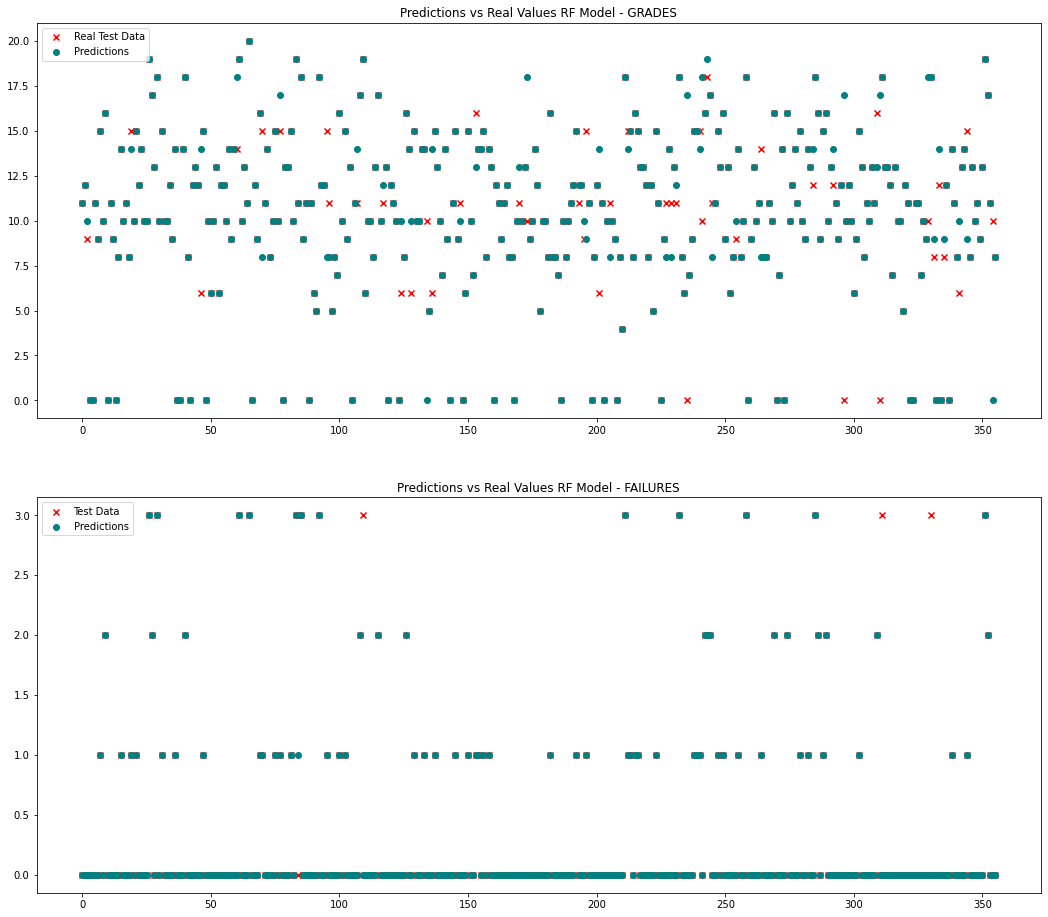

In [70]:
## ------ RANDOM FOREST ALGORITM 
print("–––––––––– RANDOM FOREST ALGORITM  ––––––––––––––")

from sklearn.ensemble import RandomForestClassifier

#GRADES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

X_g3_train, X_g3_test, y_g3_train, y_g3_test = train_test_split(X_g3, y_g3, test_size=0.3, random_state=420, stratify=y_g3)

random_forest_g3 = RandomForestClassifier()
random_forest_g3.fit(X_g3_train, y_g3_train)
Y_pred_g3_forest = random_forest_g3.predict(X_g3_test)
r2_g3_forest = random_forest_g3.score(X_g3_test, y_g3_test)

# Compute R^2 value to determine effectiveness of knn model
print("R2 effectiveness score for (GRADES|Random Forest):", r2_g3_forest,"%")

testing_model_array_g3_forest = np.array(g3_prediction_Testset)
print("Prediction for",testing_model_array_g3_forest)
y_pred_g3_forest2 = random_forest_g3.predict([testing_model_array_g3_forest])
print("The GRADE predicted is:",int(y_pred_g3_forest2))

#FAILURES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

X_failures_train, X_failures_test, y_failures_train, y_failures_test = train_test_split(X_failures, y_failures, test_size=0.3, random_state=420, stratify=y_failures)

random_forest_failures = RandomForestClassifier()
random_forest_failures.fit(X_failures_train, y_failures_train)
Y_pred_failures_forest = random_forest_failures.predict(X_failures_test)
r2_failures_forest = random_forest_failures.score(X_failures_test, y_failures_test)

# Compute R^2 value to determine effectiveness of knn model
print("R2 effectiveness score for (FAILURES|Random Forest):", r2_failures_forest,"%")

testing_model_array_failures_forest = np.array(failure_prediction_Testset)
print("Prediction for",testing_model_array_failures_forest)
y_pred_failures_forst2 = random_forest_g3.predict([testing_model_array_failures_forest])
print("The FAILURES predicted is:",int(y_pred_failures_forst2))

# VISUALIZE ACCURACY
f, axes=plt.subplots(2,1, figsize=(18,16))
plt.subplot(2,1,1)
plt.scatter([i for i in range(len(y_g3_test))], y_g3_test, label="Real Test Data", marker="x" ,color="red")
plt.scatter([i for i in range(len(y_g3_test))], Y_pred_g3_forest, label="Predictions", marker="o" ,color="teal")
plt.title("Predictions vs Real Values RF Model - GRADES")
plt.legend()

plt.subplot(2,1,2)
plt.scatter([i for i in range(len(y_failures_test))], y_failures_test, label="Test Data", marker="x" ,color="red")
plt.scatter([i for i in range(len(y_failures_test))], Y_pred_failures_forest, label="Predictions", marker="o" ,color="teal")
plt.title("Predictions vs Real Values RF Model - FAILURES")
plt.legend()
plt.show()

In [71]:
## ------ GAUSSIAN NAIVE BAYES ALGORITM 
print("–––––––––– GAUSSIAN NAIVE BAYES ALGORITM  ––––––––––––––")

from sklearn.naive_bayes import GaussianNB

#GRADES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

X_g3_train, X_g3_test, y_g3_train, y_g3_test = train_test_split(X_g3, y_g3, test_size=0.3, random_state=420, stratify=y_g3)

gaussian_g3 = GaussianNB()
gaussian_g3.fit(X_g3_train, y_g3_train)
Y_pred = gaussian_g3.predict(X_g3_test)
r2_g3_gaussian = gaussian_g3.score(X_g3_test, y_g3_test)

# Compute R^2 value to determine effectiveness of knn model
print("R2 effectiveness score for (GRADES|Gaussian):", r2_g3_gaussian,"%")

testing_model_array_g3_gaussian = np.array(g3_prediction_Testset)
print("Prediction for",testing_model_array_g3_gaussian)
y_pred_g3_gaussian = gaussian_g3.predict([testing_model_array_g3_gaussian])
print("The GRADE predicted is:",int(y_pred_g3_gaussian))

#FAILURES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

X_failures_train, X_failures_test, y_failures_train, y_failures_test = train_test_split(X_failures, y_failures, test_size=0.3, random_state=420, stratify=y_failures)

gaussian_failures = GaussianNB()
gaussian_failures.fit(X_failures_train, y_failures_train)
Y_pred = gaussian_failures.predict(X_failures_test)
r2_failures_gaussian = gaussian_failures.score(X_failures_test, y_failures_test)

# Compute R^2 value to determine effectiveness of knn model
print("R2 effectiveness score for (FAILURES|Gaussian):", r2_failures_gaussian,"%")

testing_model_array_failures_gaussian = np.array(failure_prediction_Testset)
print("Prediction for",testing_model_array_failures_gaussian)
y_pred_failures_gaussian = gaussian_failures.predict([testing_model_array_failures_gaussian])
print("The FAILURES predicted is:",int(y_pred_failures_gaussian))

–––––––––– GAUSSIAN NAIVE BAYES ALGORITM  ––––––––––––––
R2 effectiveness score for (GRADES|Gaussian): 0.14606741573033707 %
Prediction for [0 1 2 0 1 0 4 1 1 6 1 1]
The GRADE predicted is: 19
R2 effectiveness score for (FAILURES|Gaussian): 0.7752808988764045 %
Prediction for [0 1 2 1 0 4 1 1 6 6 1 1]
The FAILURES predicted is: 0


The R2 values indicate that RF and DT are the best models, with RF slightly outperforming DT. In order to decide between these two models, we will examine the distribution of errors they produce. We are not concerned with the absolute size of the errors, but rather with the direction they are in.

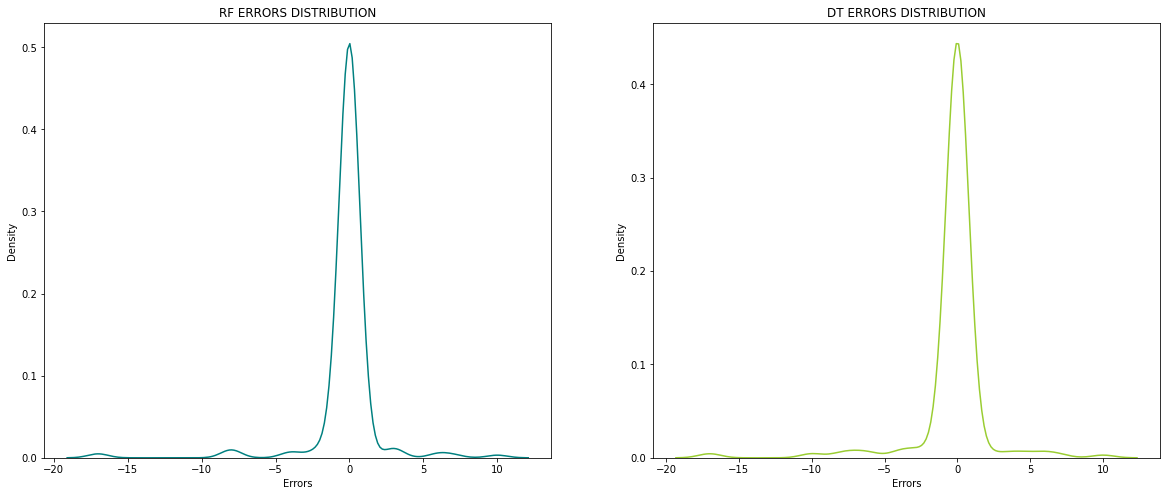

In [72]:

dist_errors_rf = y_g3_test-Y_pred_g3_forest
dist_error_dt = y_g3_test-tree_model_g3_final_for_test

f, axes=plt.subplots(1,2,figsize=(20,8))
sns.distplot(dist_errors_rf, ax=axes[0], axlabel="Errors", color="teal", hist=False).set(title="RF ERRORS DISTRIBUTION")
sns.distplot(dist_error_dt, ax=axes[1], axlabel="Errors", color="yellowgreen", hist=False).set(title="DT ERRORS DISTRIBUTION")    
plt.show() 


🚨CLICK THE IMAGE FOR INSPIRATION TO EXPLAIN THIS PART: <a href="https://freeimage.host/i/HoRKs8G"><img src="https://iili.io/HoRKs8G.md.png" alt="HoRKs8G.md.png" border="0"></a>

# Feature importance 

To wrap up our analysis of the models, let"s take a look at the most important features for predicting Grades. Based on our analysis and intuition, we believe that the top five features would be: "studytime", "higher", "failures", "goout", and "total_alc". However, using the featureimportances attribute of the Random Forest, we can find that:


Text(0.5, 1.0, 'Random Forest Features Importance on FAILURES')

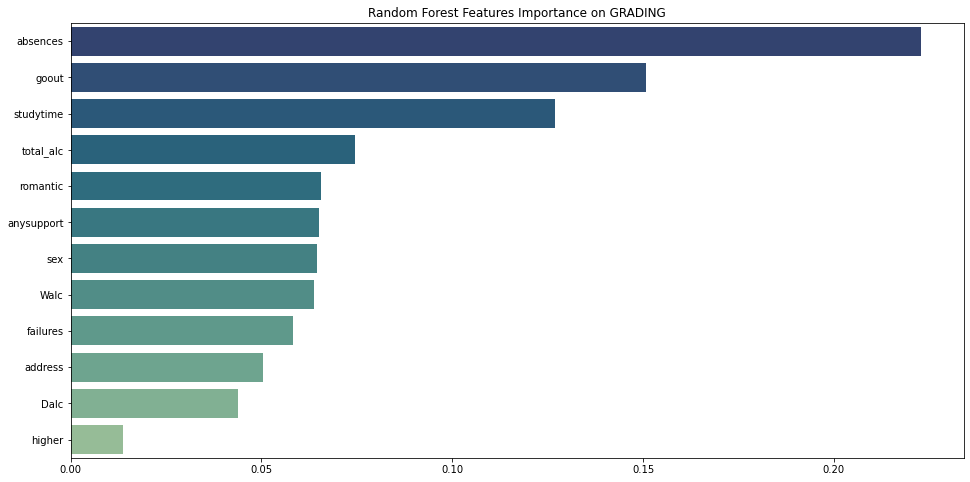

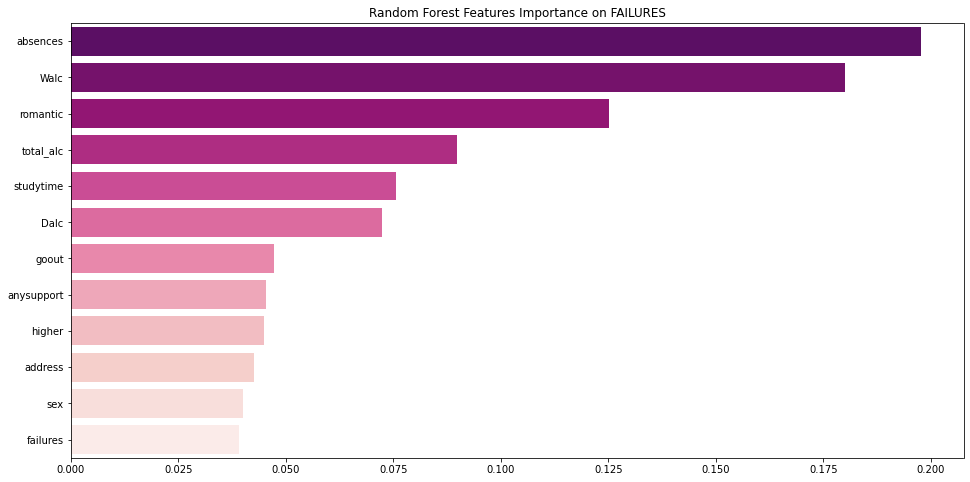

In [73]:
# Use the feature_importances_ attribute to get the importances of each feature
importances_g3 = random_forest_g3.feature_importances_

# Sort the feature importances in descending order and retrieve the 15 most important features
indexes = np.argsort(importances_g3)[::-1]
most_important_features_g3 = indexes[:15]

# Get the names of the 15 most important features
feature_names_g3 = X_g3.columns[most_important_features_g3]

# Create a barplot of the feature importances
plt.figure(figsize=(16,8))
sns.barplot(y=feature_names_g3, x=importances_g3[most_important_features_g3], palette="crest_r")
plt.title("Random Forest Features Importance on GRADING")


# FAILURES –––––––––––––––––––––––––
# Use the feature_importances_ attribute to get the importances of each feature
importances_failures = random_forest_failures.feature_importances_

# Sort the feature importances in descending order and retrieve the 15 most important features
indexes_failures = np.argsort(importances_failures)[::-1]
most_important_features_failures = indexes_failures[:15]

# Get the names of the 15 most important features
feature_names_failures = X_g3.columns[most_important_features_failures]

# Create a barplot of the feature importances
plt.figure(figsize=(16,8))
sns.barplot(y=feature_names_failures, x=importances_failures[most_important_features_failures], palette="RdPu_r")
plt.title("Random Forest Features Importance on FAILURES")


🚨🚨🚨🚨🚨
USE FOR INSPIRATION

*Thus the Random Forest indicates 'failures', 'absences', 'higher', 'age', and 'Walc' as the most important features for predicting the final grade G3. Thus, the Random Forest do not consider the 'studytime' and 'goout' as important as we might think for predicting the final grade G3 according both the common sense and the provided EDA. Conversely, the Random Forest considers as more important variables like 'absences' and 'age'. Especially for the first one it does not surprise us that it is considered important to the model. However we did not include the 'absences' variable into the 'most important variables' since we saw in the EDA that the relation between the number of absences and G3 is pretty irregular and the linear correlation between G3 and 'absences' is near to -0.1, which is quite low. It is also interesting to notice that for the model 'failures' is much more important than all the other variables for the prediction.*

# APPLICATION: GRADE PREDICTOR:

In [92]:

# Using user generated input values to determine final grading: 

from sklearn.ensemble import RandomForestClassifier
import time
import pandas as pd
import numpy as np


all_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Maths.csv")

#cleanup the data by removing possible duplicates (just in case there are ^^)
all_students = all_data.copy().drop(["school", "G1", "G2"], axis=1)
all_students = all_students.drop_duplicates()

all_students = all_students.dropna()


categorized_students = all_students.copy()
# Sum and average both alc consumption comlumns
total_alc = ((all_students["Dalc"] + all_students["Walc"]) / 2).round(decimals=1)
# Add the new column to the dataframe
categorized_students["total_alc"] = total_alc
categorized_students["anysupport"] = ["yes" if i == "yes" or j == "yes" else "no" for i,j in zip(all_students.famsup,all_students.schoolsup)]
# Remove irrelevant features

categorized_students = categorized_students.drop(["famsize", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "paid", "activities", "nursery", "internet", "famrel","schoolsup","famsup"], axis=1)

# Examine which features need to be categorized as integer values for our model generation and learning algorithm
#print(categorized_students.info())

# Categorization of features
categorized_students["sex"] = categorized_students["sex"].astype("category")
categorized_students["sex"] = categorized_students["sex"].cat.codes

categorized_students["address"] = categorized_students["address"].astype("category")
categorized_students["address"] = categorized_students["address"].cat.codes

categorized_students["Pstatus"] = categorized_students["Pstatus"].astype("category")
categorized_students["Pstatus"] = categorized_students["Pstatus"].cat.codes

categorized_students["higher"] = categorized_students["higher"].astype("category")
categorized_students["higher"] = categorized_students["higher"].cat.codes

categorized_students["romantic"] = categorized_students["romantic"].astype("category")
categorized_students["romantic"] = categorized_students["romantic"].cat.codes

categorized_students["anysupport"] = categorized_students["anysupport"].astype("category")
categorized_students["anysupport"] = categorized_students["anysupport"].cat.codes

# scaling the dataset
duplicated_categorized_students = pd.concat([categorized_students, categorized_students, categorized_students])

# DROP FEATURES OUT OF SCOPE AND RELEVANCE
X_g3 = duplicated_categorized_students.drop(["age","G3","health","freetime","Pstatus",], axis=1)
y_g3 = duplicated_categorized_students["G3"]


#GRADES ––––––––––––––––––––––––––––––––––––––––––––––––––––––––

X_g3_train, X_g3_test, y_g3_train, y_g3_test = train_test_split(X_g3, y_g3, test_size=0.3, random_state=420, stratify=y_g3)

random_forest_userInput = RandomForestClassifier()
random_forest_userInput.fit(X_g3_train, y_g3_train)

accuracy_random_forest_userInput = random_forest_userInput.score(X_g3_test, y_g3_test)


print("––––––– WELCOME TO THE GRADE PREDICTOR! –––––––")
print("\n\nPlease enter some personal information that we can calculate your final grade.")

user_sex = int(input("\nPlease enter your GENDER (0 = male, 1 = female):"))
user_address = int(input("Please enter your RESIDENCE (0 = Urban, 1 = Rural):"))
user_studytime = int(input("Please enter your STUDYTIME per week (1 = < 2 hours, 2 = 2-5 hours, 3 = 5-10 hours, 4 = 10+ hours):"))
user_failures = int(input("Please enter the number of FAILURES you had in the past (Number):"))
user_higher = int(input("Please enter your desire to pursue FURTHER EDUCATION (0 = no, 1 = yes):"))
user_romantic = int(input("Please enter your RELATIONSHIP STATUS (0 = Single, 1 = In relationship):"))
user_goout = int(input("Please indicate how often you GO OUT WITH FRIENDS PER WEEK (1 = never, 2 = rarely, 3 = sometimes, 4 = often, 5 = every day):"))
user_Dalc = int(input("Please indicate your ALCOHOL CONSUMPTION on WEEKDAYS (1 = low/none, 2 = slight, 3 = casual, 4 = often, 5 = High frequency):"))
user_Walc = int(input("Please indicate your WEEKEND ALCOHOL CONSUMPTION (1 = low/none, 2 = slight, 3 = casual, 4 = often, 5 = High frequency):"))
user_absences = int(input("Please enter the number of ABSENCES you had in the past (Number):"))
user_total_alc = int(round(((user_Dalc + user_Walc) / 2),1))
user_anysupport = int(input("Do you receive any EDUCATIONAL SUPPORT? (0 = no, 1 = yes):"))


prediction_Set_User = [user_sex, user_address, user_studytime, user_failures, user_higher, user_romantic, user_goout, user_Dalc, user_Walc, user_absences, user_total_alc, user_anysupport]


print("Calculating Grade, please wait.......")

time.sleep(1)

print(g3_prediction_Testset)
print(prediction_Set_User)
# Print effectiveness of prediction
print("Probability of receiving the predicted Grade:", accuracy_random_forest_userInput*100,"%")

# Predict and display result
predicting_array_input = np.array(prediction_Set_User)
print("Grade prediction for user input of",predicting_array_input)
random_forest_userInput_prediction = random_forest_userInput.predict([predicting_array_input])
print("The GRADE predicted is:",int(random_forest_userInput_prediction))



––––––– WELCOME TO THE GRADE PREDICTOR! –––––––


Please enter some personal information that we can calculate your final grade.

Please enter your GENDER (0 = male, 1 = female):0
Please enter your RESIDENCE (0 = Urban, 1 = Rural):1
Please enter your STUDYTIME per week (1 = < 2 hours, 2 = 2-5 hours, 3 = 5-10 hours, 4 = 10+ hours):2
Please enter the number of FAILURES you had in the past (Number):0
Please enter your desire to pursue FURTHER EDUCATION (0 = no, 1 = yes):1
Please enter your RELATIONSHIP STATUS (0 = Single, 1 = In relationship):0
Please indicate how often you GO OUT WITH FRIENDS PER WEEK (1 = never, 2 = rarely, 3 = sometimes, 4 = often, 5 = every day):2
Please indicate your ALCOHOL CONSUMPTION on WEEKDAYS (1 = low/none, 2 = slight, 3 = casual, 4 = often, 5 = High frequency):1
Please indicate your WEEKEND ALCOHOL CONSUMPTION (1 = low/none, 2 = slight, 3 = casual, 4 = often, 5 = High frequency):1
Please enter the number of ABSENCES you had in the past (Number):0
Do you receiv